<H1><center><font color='limegreen'>Bank Marketing Campaign Analysis</font>
<br>----------

<H3><font color='limegreen'>By : Group Delta</font>
<br>- Fathur Rizky Maulana
<br>- Alfian Abdul Ghaffar
<br>- Dafiq Alfaiz
<br>-------------------------

# **Contents**

0. Initial Setup
1. Exploratory Data Analysis
2. Data Preprocessing

----
----

## **`0. Initial Setup`**

In [321]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Membuat grafik
import seaborn as sns #Membuat grafik
import missingno as msno #Cek missing value

# statistics
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Imbalance data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss
from imblearn.combine import SMOTEENN

# Model Selection
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score, fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb

# Pipeline
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

### **Import File**

In [322]:
# Import file CSV

path = 'bank_additional_data_for_eda.csv'

df = pd.read_csv(path)

print(f'Data ini memiliki jumlah baris dan kolom: {df.shape}')
df.sample(10)


Data ini memiliki jumlah baris dan kolom: (41176, 24)


,age,age_range,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36562,33,25-39,technician,single,university.degree,no,yes,yes,cellular,jun,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,no
21127,48,40-64,services,married,high.school,no,no,no,cellular,aug,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
20538,38,25-39,technician,divorced,professional.course,no,yes,no,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
13557,25,25-39,technician,single,professional.course,no,yes,no,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2248,51,40-64,entrepreneur,divorced,unknown,no,yes,no,telephone,may,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
953,46,40-64,management,married,basic.9y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
25945,30,25-39,blue-collar,single,basic.9y,no,no,no,cellular,nov,...,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
5706,43,40-64,entrepreneur,married,high.school,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
15792,29,25-39,admin.,single,university.degree,no,yes,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
33196,59,40-64,blue-collar,married,basic.9y,no,yes,yes,cellular,may,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no


## **`1. Exploratory Data Analysis`**

Untuk mempermudah dalam analisis data, kita akan membagi fitur yang ada dalam dataset menjadi beberapa persoalan, sebagai berikut:
1. Analisis berdasarkan informasi personal nasabah (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`)
2. Analisis metode kontak yang dilakukan (`contact`, `month`, `day_of_week`, `duration`)
3. Analisis hasil campaign sebelumnya (`campaign`, `pdays`, `previous`, `poutcome`)
4. Analisis data ekonomi negara portugal (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.rmployed`)

### **1.1 Analisis Berdasarkan Informasi Personal Nasabah** (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`)

#### **1.1.1 Fitur `age` & `age_range`**

Kita akan cek pesebaran data untuk fitur **`age`**

<Figure size 1500x2000 with 0 Axes>

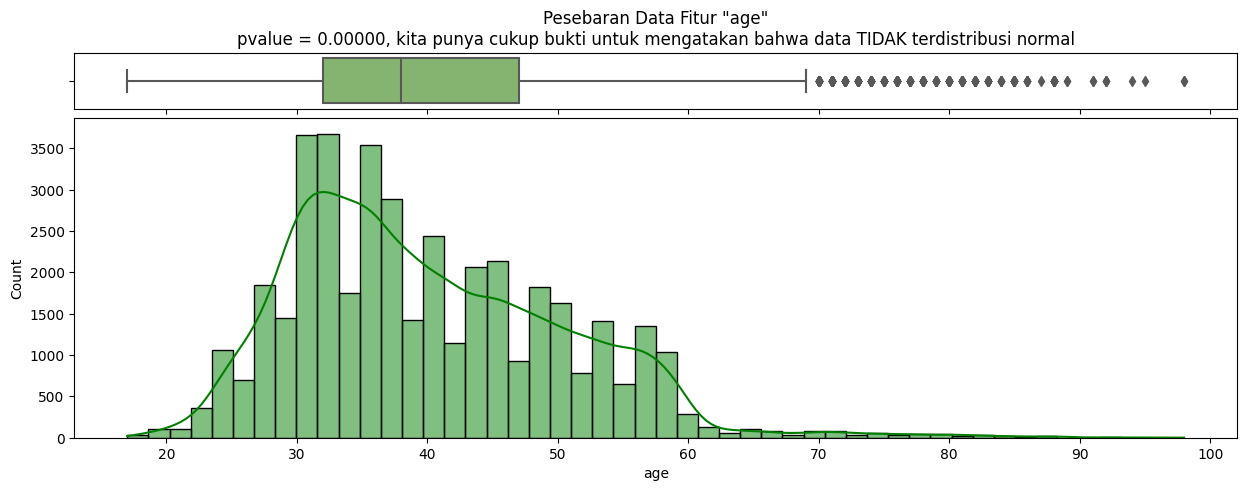

In [323]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["age"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "age"\n{distribusi}""", color = "black")
sns.boxplot(x = df["age"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["age"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu rentang usia 30-45 tahun 
* Nasabah yang paling banyak dihubungi ialah nasabah dengan range usia 30-45 tahun. Hal ini menandakan bank menargetkan calon nasabah dengan rentang usia tersebut dengan harapan usia tersebut meruakan usia yang dianggap sudah matang dari sisi finansial dan sedang dalam masa produktif-nya

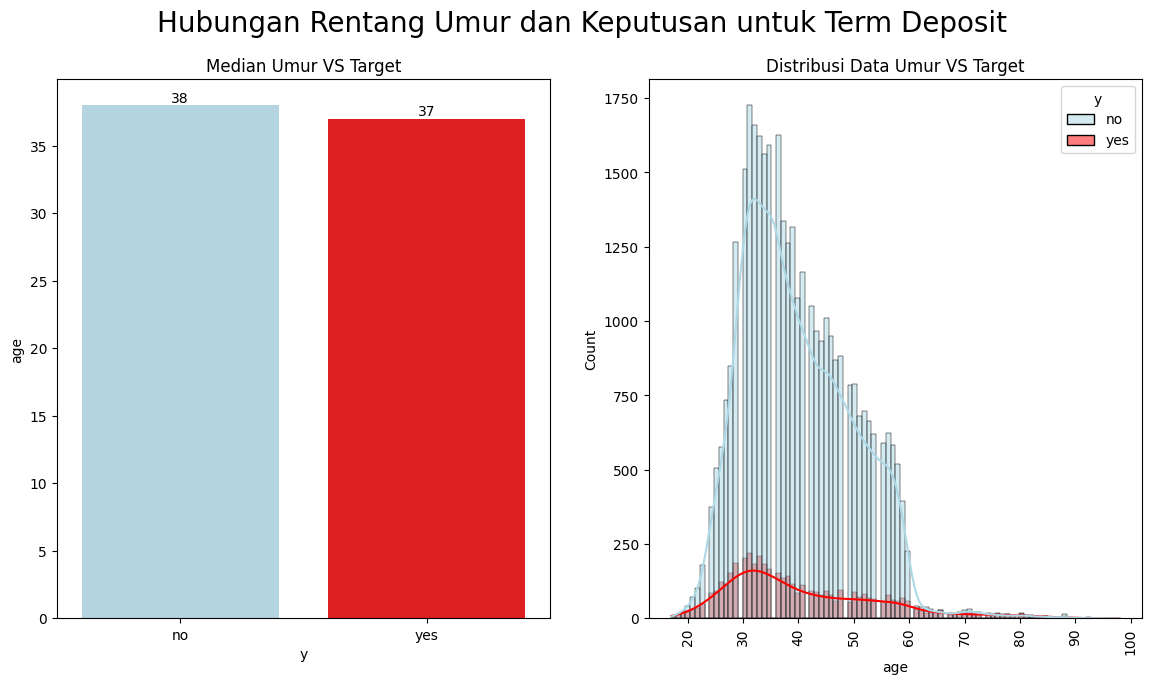

In [324]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

plt.suptitle('Hubungan Rentang Umur dan Keputusan untuk Term Deposit', size=20)

axes[0].set_title('Median Umur VS Target')
plot1 = sns.barplot(x='y', y='age', data=df, estimator=np.median, ci=0, ax=axes[0], palette={'yes':'red', 'no':'lightblue'})  # Ubah warna di sini
plot1.bar_label(plot1.containers[0], label_type='edge', color='black')  # Tambahkan warna label

axes[1].set_title('Distribusi Data Umur VS Target')
plot2 = sns.histplot(data=df, hue='y', x=df['age'], stat='count', ax=axes[1], kde=True, palette={'yes':'red', 'no':'lightblue'})  # Ubah warna di sini
plt.xticks(rotation=90)

plt.show()


Dalam kasus ini, kita ingin menguji apakah terdapat perbedaan signifikan antara median umur orang-orang yang melakukan deposit term (term deposit) dan mereka yang tidak melakukan deposit. Namun, berdasarkan visualisasi awal, perbedaan tersebut tidak tampak dengan jelas. Oleh karena itu, kita akan menggunakan uji hipotesis Mann-Whitney untuk secara statistik menilai apakah perbedaan median ini adalah hasil kebetulan atau signifikan secara nyata.

Hipotesis :

- Ho : Distribusi Data age 'Yes' = Distribusi Data age 'No'
- Ha : Distribusi Data age 'Yes' != Distribusi Data age 'No'

In [325]:
stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['age'],
    df[df['y'] == 'no']['age'],
    alternative = 'two-sided'
)
pvalue

0.01563777740572028

In [326]:
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Tidak cukup bukti untuk menolak Ho.
          Tidak ada cukup bukti statistik untuk mengatakan bahwa Distribusi data umur orang yang setuju untuk term deposit SAMA dengan
          Distribusi data umur orang yang menolak melakukan term deposit
          (Tidak ada perbedaan yang signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Terdapat cukup bukti statistik untuk mengatakan bahwa Distribusi data umur orang yang setuju untuk term deposit TIDAK SAMA dengan
          Distribusi data umur orang yang menolak term deposit
          (Ada perbedaan yang signifikan)
          ''')



          pvalue = 0.01564. pvalue <= 0.05. Berhasil menolak Ho.
          Terdapat cukup bukti statistik untuk mengatakan bahwa Distribusi data umur orang yang setuju untuk term deposit TIDAK SAMA dengan
          Distribusi data umur orang yang menolak term deposit
          (Ada perbedaan yang signifikan)
          


**Temuan (Insight):**

Dari hasil analisis di atas, tampaknya umur memainkan peran dalam memengaruhi keputusan seseorang untuk menerima term deposit.

Untuk memvisualisasikan temuan ini lebih jelas, kita akan mengeksplorasi hubungan antara kategori rentang umur (age_range) dengan target, dan juga menghitung conversion rate untuk setiap rentang umur.

Kita akan cek pesebaran data untuk fitur **`age_range`**

Setelah kita mengetahui pesebaran data pada fitur `age`, selanjutnya kita akan coba melihat hubungan antar fitur `age_range` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok.

Maksud Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

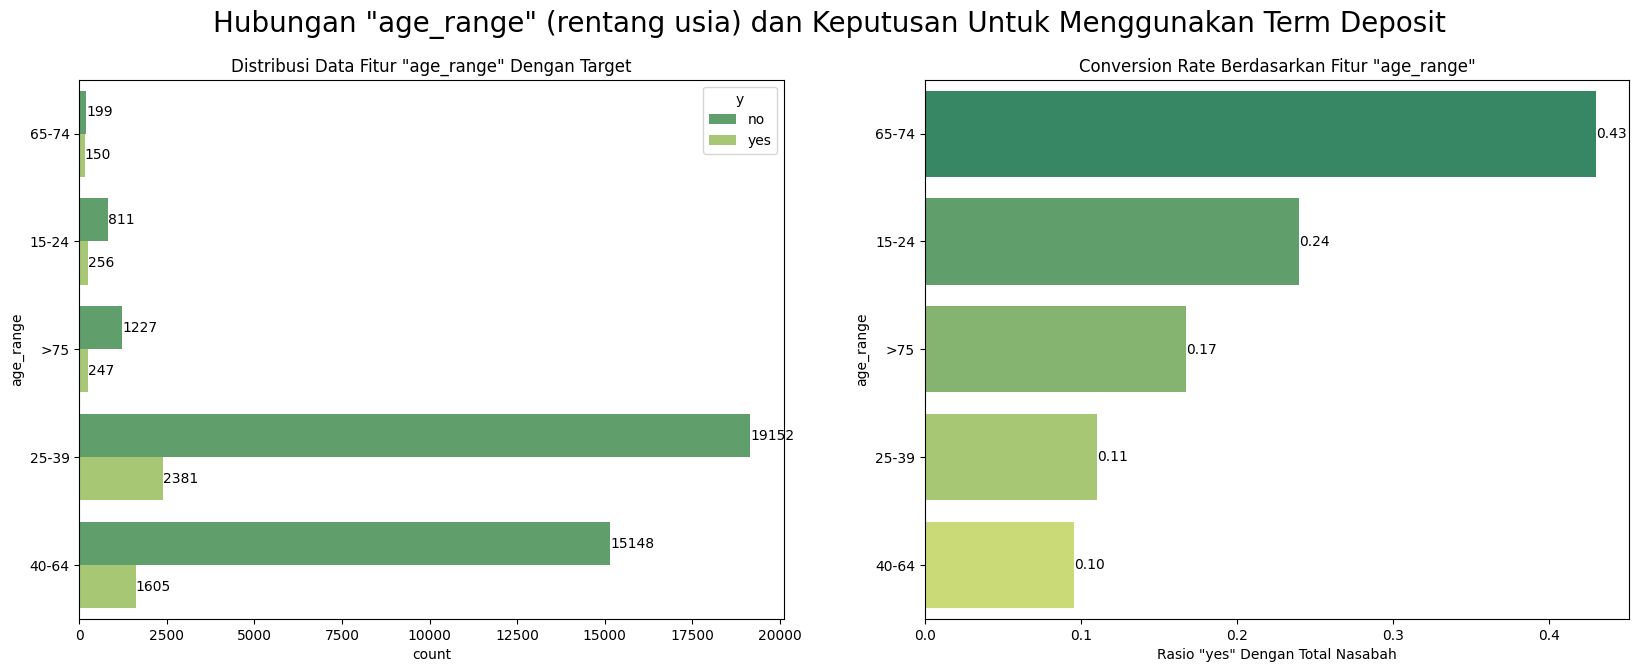

In [327]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "age_range" (rentang usia) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['age_range','age']].groupby(['age_range'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['age_range','age']].groupby(['age_range']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur age_range dengan Target
axes[0].set_title('Distribusi Data Fitur "age_range" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'age_range', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['age_range'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='age_range', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['age_range'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "age_range"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Berdasarkan grafik distribusi fitur `age_range` dengan target, Bank lebih banyak menawarkan produk Term Deposit kepada nasabah dengan kelompok usia 25-39 tahun dan 40-64 tahun (nasabah usia produktif)
* Pada grafik CVR berdasarkan kelompok usia, nasabah dengan kelompok usia 56-74 tahun, dan 15-24 tahun justru memiliki conversion rate yang tertinggi dibanding dengan kelompok usia produktif, dengan nilai CVR masing-masing kelompok usia adalah 0.43% dan 0.24%

#### **1.1.2 Fitur `job`**

Kita akan melihat hubungan antar fitur `job` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

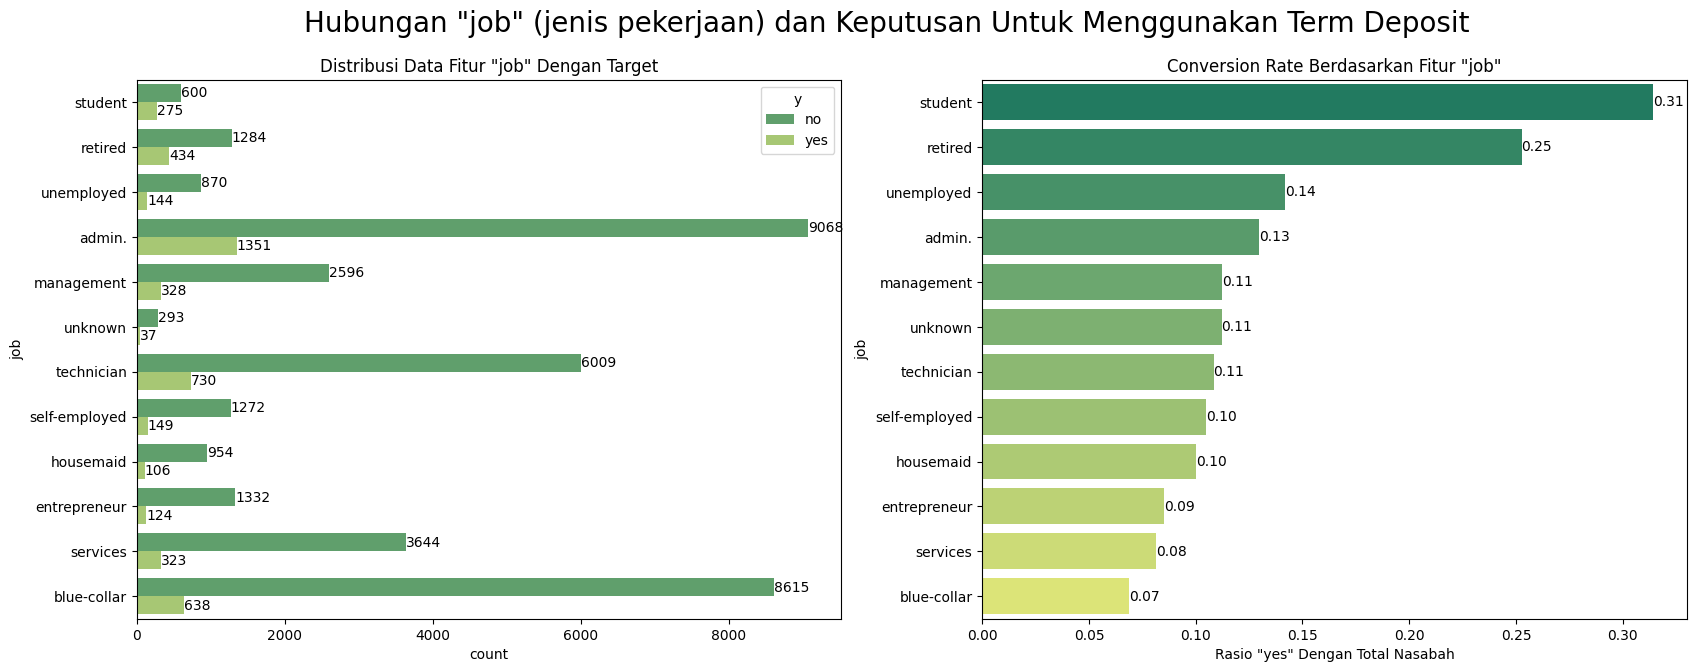

In [328]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "job" (jenis pekerjaan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['job','age']].groupby(['job'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['job','age']].groupby(['job']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur job dengan Target
axes[0].set_title('Distribusi Data Fitur "job" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'job', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['job'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='job', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['job'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "job"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Pekerjaan sebagai **`admin`**, merupakan pekerjaan yang paling banyak ditawari Term Deposit, dan juga merupakan pekerjaan dengan CVR yang cukup tinggi sekitar **0.13**. Hal ini bisa menjadi salah satu bahan pertimbangan perusahaan untuk tetap menawarkan produk Term Deposit kepada nasabah yang bekerja sebagai **`admin`**, atau memberikan penawaran yang menarik untuk jenis pekerjaan tersebut
* Pekerjaan sebagai **`blue-collar (buruh)`** merupakan pekerjaan tertinggi kedua setelah **`admin`** yang paling banyak ditawari produk Term Deposit namun pekerjaan tersebut memiliki CVR yang paling rendah dibanding dengan jenis pekerjaan lainnya. Hal ini memberi insight kepada perusahaan untuk membuat kebijakan baru atau metode yang lebih efektif lagi agar mereka dapat lebih tertarik dan menggunakan produk Term Deposit
* Pekerjaan sebagai **`student (pelajar)`** dan **`retired (pensiunan)`** memiliki conversion rate tertinggi dengan nilai masing-masing CVR adalah **0.31** dan **0.25**. Hal ini sesuai dengan insight dari fitur `age` dimana conversion rate tertinggi pada nasabah dengan **usia 65-74 tahun (mayoritas retired)**, dan nasabah dengan **usia 15-24 (mayoritas pelajar)**
* Hal unik adalah pada nasabah dengan pekerjaan **`unemployed (pengangguran)`**, dimana pekerjaan tersebut merupakan pekerjaan dengan conversion rate tertinggi ketiga dengan nilai **0.14**
* Nasabah yang tidak diketahui jenis pekerjaan nya **`unknown`** memiliki CVR yang cukup tinggi. Hal ini merupakan sinyal kepada perusahaan agar dapat lebih berhati-hati dan lebih detail dalam masalah pendataan identitas nasabah terutama pada bagian jenis pekerjaan

#### **1.1.3 Fitur `marital`**

Kita akan melihat hubungan antar fitur `marital` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

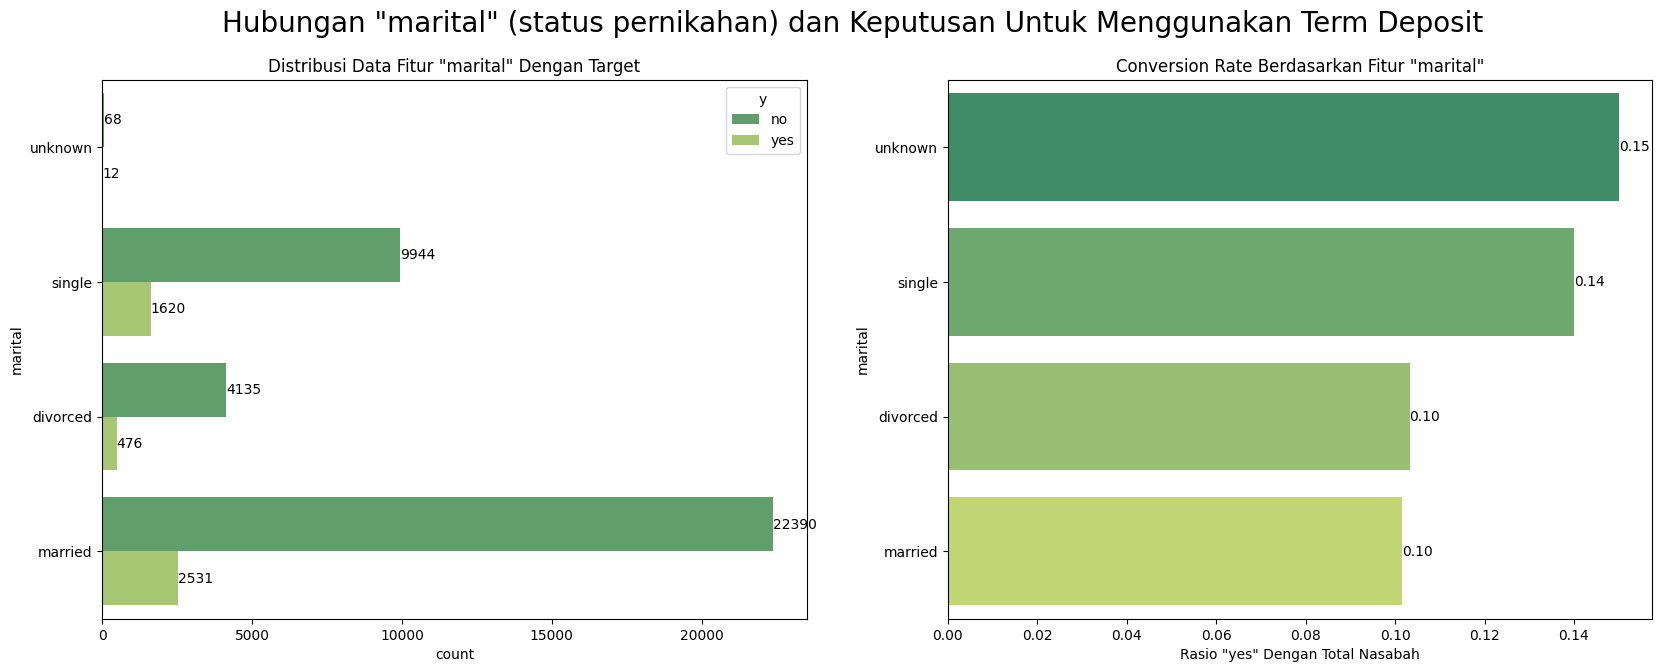

In [329]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "marital" (status pernikahan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['marital','age']].groupby(['marital'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['marital','age']].groupby(['marital']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur marital dengan Target
axes[0].set_title('Distribusi Data Fitur "marital" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'marital', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['marital'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='marital', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['marital'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "marital"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Nasabah dengan status pernikahan **`married (sudah menikah)`** merupakan status pernikahan yang paling banyak ditawari produk Term Deposit sekitar **24,921 nasabah**. Hal ini juga sesuai dengan insight dari fitur `age`, dimana nasabah yang paling banyak ditawari produk Term Deposit ialah nasabah dengan rentang usia 25-39 tahun, dimana rentang usia tersebut ialah usia yang umumnya berstatus `married (sudah menikah)`
* Nasabah yang tidak diketahui status pernikahannya (`unknown`) memiliki CVR tertinggi dengan nilai **0.15**. Hal ini merupakan sinyal kepada perusahaan agar dapat lebih berhati-hati dan lebih detail dalam pendataan identitas nasabah pada bagian status pernikahan
* Nasabah yang berstatus `single (belum menikah)` memiliki CVR yang tinggi sekitar **0.14**. Hal ini dapat diterima karena nasabah dengan status `single (belum menikah)` relatif tidak memiliki pengeluaran yang banyak, sehingga nasabah tersebut memiliki cukup dana untuk dapat diinvestasikan pada produk Term Deposit

#### **1.1.4 Fitur `education`**

Kita akan melihat hubungan antar fitur `education` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

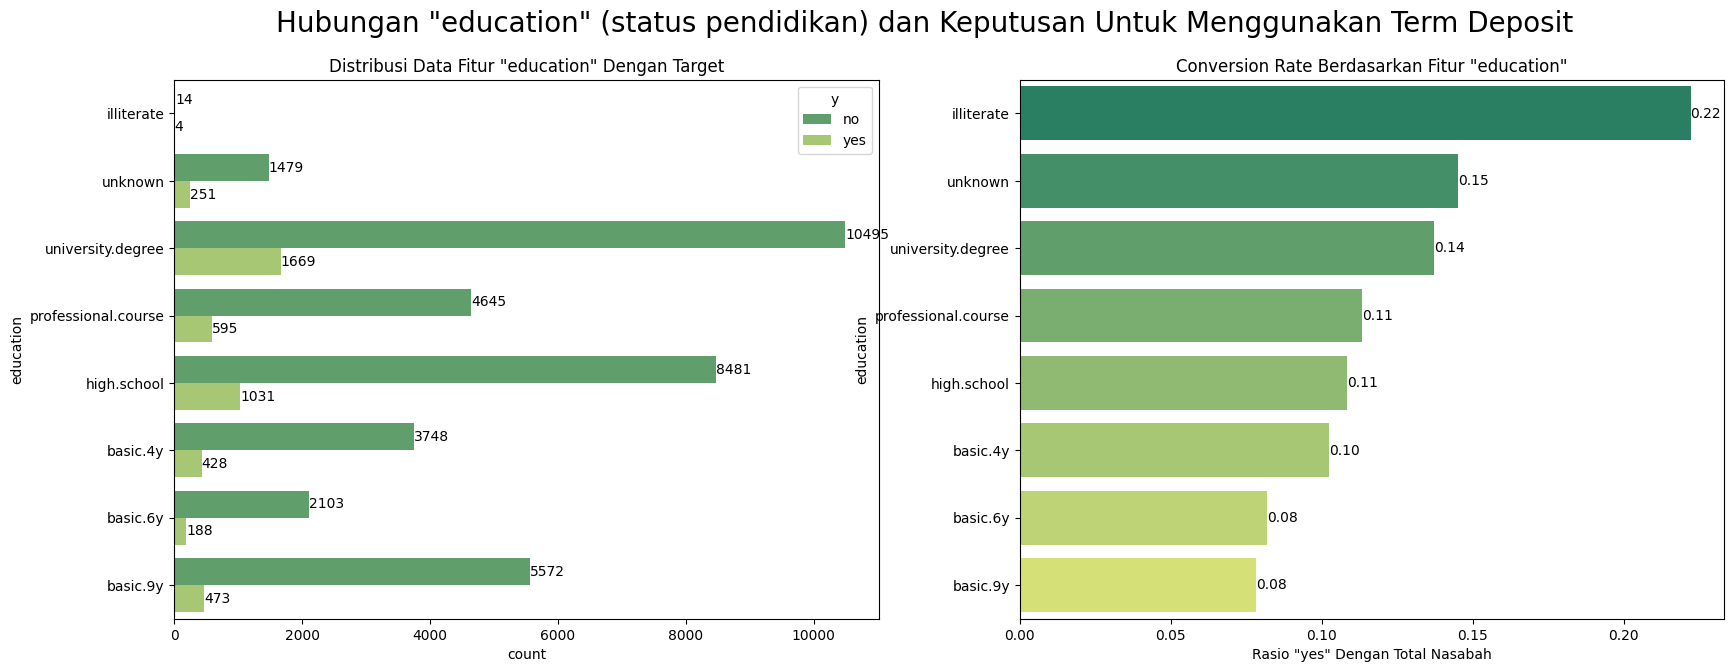

In [330]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "education" (status pendidikan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['education','age']].groupby(['education'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['education','age']].groupby(['education']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur education dengan Target
axes[0].set_title('Distribusi Data Fitur "education" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'education', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['education'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='education', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['education'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "education"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Dari grafik diatas nasabah dengan status pendidikan terakhir `university.degree (gelar universitas)` merupakan status terbanyak untuk ditawari produk Term Deposit. Dari grafik conversion rate, status pendidikan tersebut merupakan salah satu kelompok yang memiliki CVR tinggi sebesar **0.14**
* Nasabah yang tidak diketahui status pendidikannya (`unknown`) menempati posisi kedua kelompok dengan nilai CVR tertinggi yaitu **0.15**. Lagi-lagi perusahaan harus lebih berhati-hati dan lebih detail dalam pendataan identitas nasabah pada bagian status pendidikan ini
* Nasabah dengan status pendidikan `illiterate` (tidak pernah mengecap pendidikan) memiliki nilai CVR tertinggi yaitu sebesar **0.22**. Hal ini akan sulit untuk diambil kesimpulan, karena jika dilihat dari jumlah datanya, nasabah dengan status `illiterate` hanya berjumlah **18 nasabah** atau **0.04% dari total populasi** dalam dataset ini

#### **1.1.5 Fitur `default`**

Kita akan melihat hubungan antar fitur `default` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

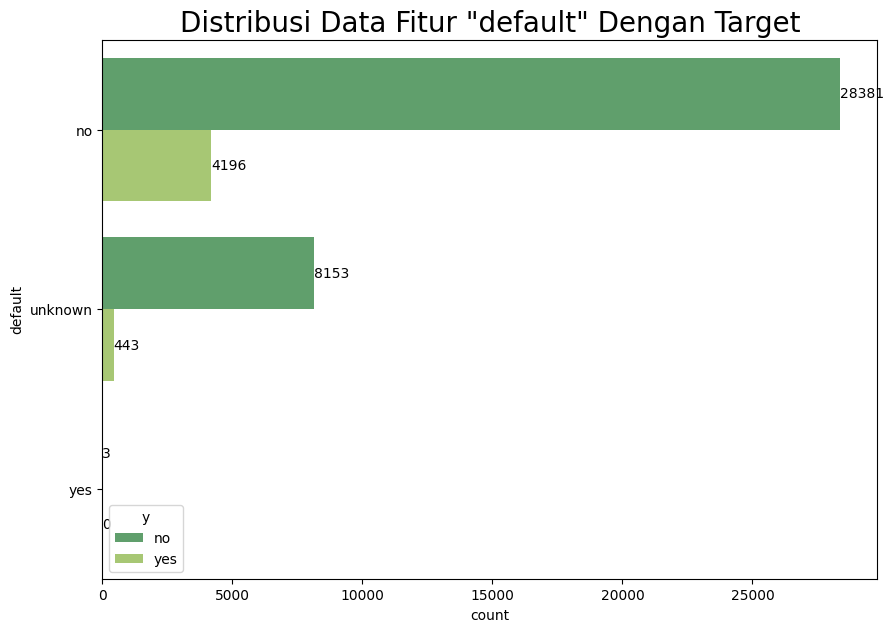

Summary Data untuk Fitur 'default':
Jumlah Data:
no         32577
unknown     8596
yes            3
Name: default, dtype: int64


In [331]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.title('Distribusi Data Fitur "default" Dengan Target', size=20)

# Hitung jumlah nasabah dalam setiap kategori "default"
default_counts = df['default'].value_counts()

# Grafik Distribusi fitur "default" dengan Target (tampilan horizontal)
plot1 = sns.countplot(data=df, y='default', hue='y', order=default_counts.index, palette="summer", orient='h')
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

plt.show()

# Hitung jumlah nasabah dalam setiap kategori "default" dan "y"
default_counts = df['default'].value_counts()
y_counts = df['y'].value_counts()

# Tampilkan summary data
print("Summary Data untuk Fitur 'default':")
print("Jumlah Data:")
print(default_counts)


In [332]:
df[df['default'] == 'yes']

,age,age_range,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21573,48,40-64,technician,married,professional.course,yes,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21574,48,40-64,technician,married,professional.course,yes,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24859,31,25-39,unemployed,married,high.school,yes,no,no,cellular,nov,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


**Insight:**

Dari data di atas, terdapat 3 nasabah yang pernah mengalami kegagalan pembayaran, yang merupakan hanya sekitar 0,0072% dari seluruh dataset. Selain itu, tampak bahwa semua nasabah yang pernah mengalami kegagalan pembayaran menolak untuk melakukan deposito jangka panjang, yang berarti bahwa conversion rate mereka adalah 0%. Ini sesuai dengan pemahaman umum bahwa nasabah yang pernah mengalami kegagalan pembayaran mungkin sedang menghadapi kondisi ekonomi yang sulit, sehingga mereka tidak memiliki dana tambahan untuk didepositokan.

Dengan demikian, fitur ini mengandung informasi yang signifikan untuk mengidentifikasi karakteristik nasabah yang kemungkinan besar akan melakukan deposito jangka panjang. Berdasarkan dataset, dapat disimpulkan bahwa **"Setiap nasabah yang pernah mengalami kegagalan pembayaran kemungkinan besar tidak akan melakukan deposito jangka panjang."**. Akan lebih baik jika nasabah tersebut diwajibkan untuk melunasi kredit macet terlebih dahulu sebelum ditawarkan untuk program deposite

#### **1.1.6 Fitur `housing`**

Kita akan melihat hubungan antar fitur `housing` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

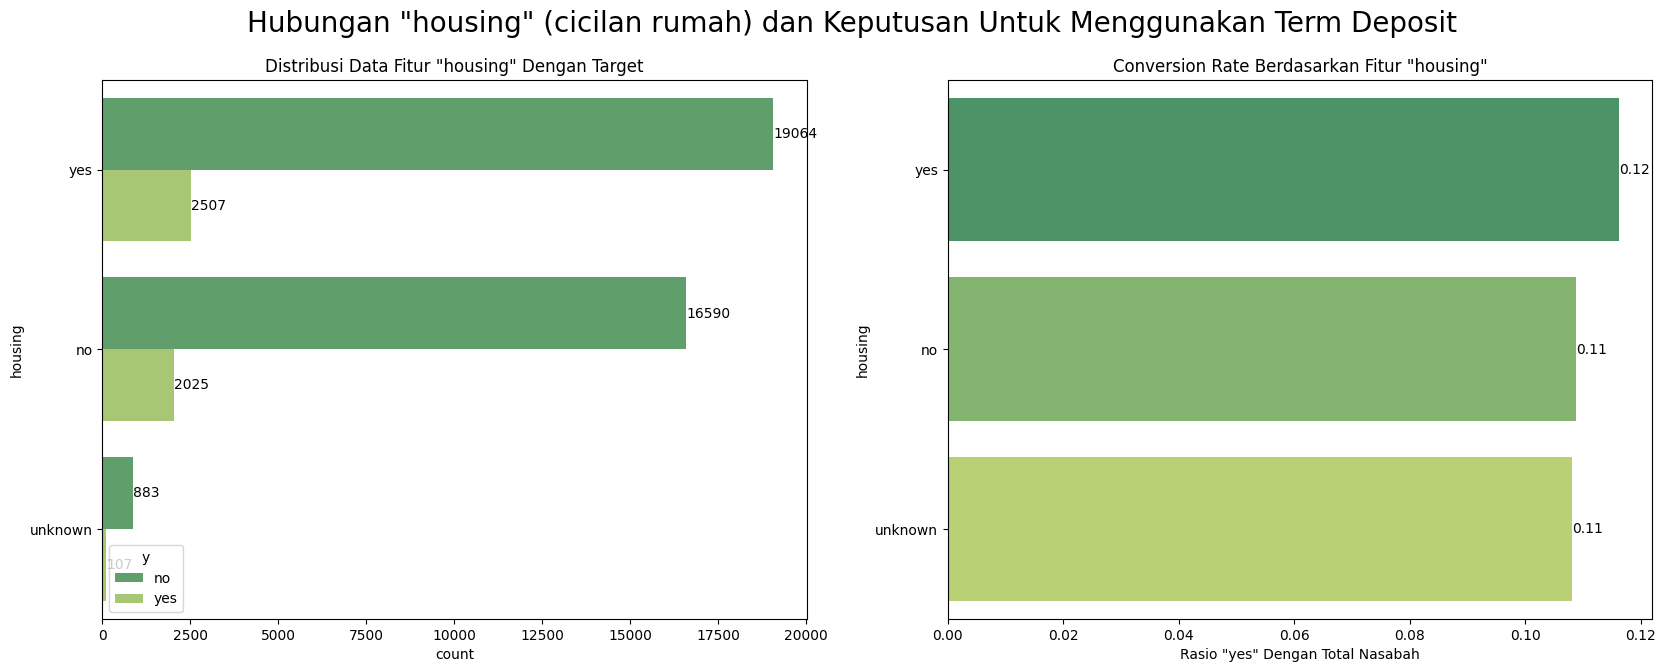

In [333]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "housing" (cicilan rumah) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['housing','age']].groupby(['housing'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['housing','age']].groupby(['housing']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur housing dengan Target
axes[0].set_title('Distribusi Data Fitur "housing" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'housing', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['housing'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='housing', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['housing'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "housing"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

**Insight:**

Dari grafik di atas, berdasarkan visualisasi conversion rate, tidak terlihat perbedaan yang signifikan. Meskipun kita dapat menyimpulkan bahwa individu yang tidak memiliki cicilan rumah memiliki conversion rate yang sedikit lebih tinggi. Untuk menguji hubungan yang lebih akurat antara kepemilikan cicilan rumah oleh seseorang dan kemungkinan mereka melakukan deposito jangka panjang, akan dilakukan uji hipotesis chi-square:

**"Untuk mengkonfirmasi secara statistik apakah ada hubungan antara kepemilikan cicilan rumah dan kemungkinan seseorang melakukan deposito jangka panjang, akan dilakukan uji hipotesis chi-square."**

Hipotesis:

- H0: Tidak ada hubungan antara pengambilan cicilan rumah dan kecenderungan nasabah untuk melakukan deposito jangka panjang.
- Ha: Terdapat hubungan antara pengambilan cicilan rumah dan kecenderungan nasabah untuk melakukan deposito jangka panjang.

In [334]:
df_housing = df[['housing','y']]
df_housing['yes'] = df_housing['y'].apply(lambda x : 1 if x == 'yes' else 0)
df_housing['no'] = df_housing['y'].apply(lambda x : 1 if x == 'no' else 0)
df_housing = df_housing.drop(columns = 'y')
df_housing_chi = df_housing.groupby('housing').sum()
df_housing_chi

,yes,no
housing,,
no,2025,16590
unknown,107,883
yes,2507,19064


In [335]:
stat, pvalue, dof, expected = chi2_contingency(df_housing_chi)
# Kesimpulan:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. Tidak ada cukup bukti untuk menolak H0.
          Kita TIDAK memiliki cukup bukti untuk menyatakan bahwa terdapat hubungan antara pengambilan pinjaman dan kecenderungan untuk melakukan deposito jangka panjang (proporsi keduanya tidak berbeda secara signifikan).
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. Kami memiliki cukup bukti untuk menolak H0.
          Terdapat hubungan antara pengambilan pinjaman dan kecenderungan untuk melakukan deposito jangka panjang (proporsi keduanya berbeda secara signifikan).
          ''')



          p-value = 0.05664. p-value > 0.05. Tidak ada cukup bukti untuk menolak H0.
          Kita TIDAK memiliki cukup bukti untuk menyatakan bahwa terdapat hubungan antara pengambilan pinjaman dan kecenderungan untuk melakukan deposito jangka panjang (proporsi keduanya tidak berbeda secara signifikan).
          


**Insight:**

Dari data di atas, hasilnya menunjukkan bahwa tidak ada keterkaitan yang signifikan antara pengambilan pinjaman dan kecenderungan nasabah untuk melakukan deposito. Jika kita melihat nilai p-value yang kecil, kita masih dapat menyimpulkan bahwa terdapat sedikit hubungan antara cicilan rumah dan kecenderungan nasabah untuk melakukan deposito. Namun, berdasarkan pengetahuan dalam domain, kita dapat berasumsi bahwa orang-orang yang masih memiliki kewajiban cicilan rumah kemungkinan besar tidak akan mengalokasikan uangnya ke dalam deposito, karena mereka masih harus memprioritaskan pembayaran cicilan tersebut.

#### **1.1.7 Fitur `loan`**

Kita akan cek pesebaran data untuk fitur `loan`

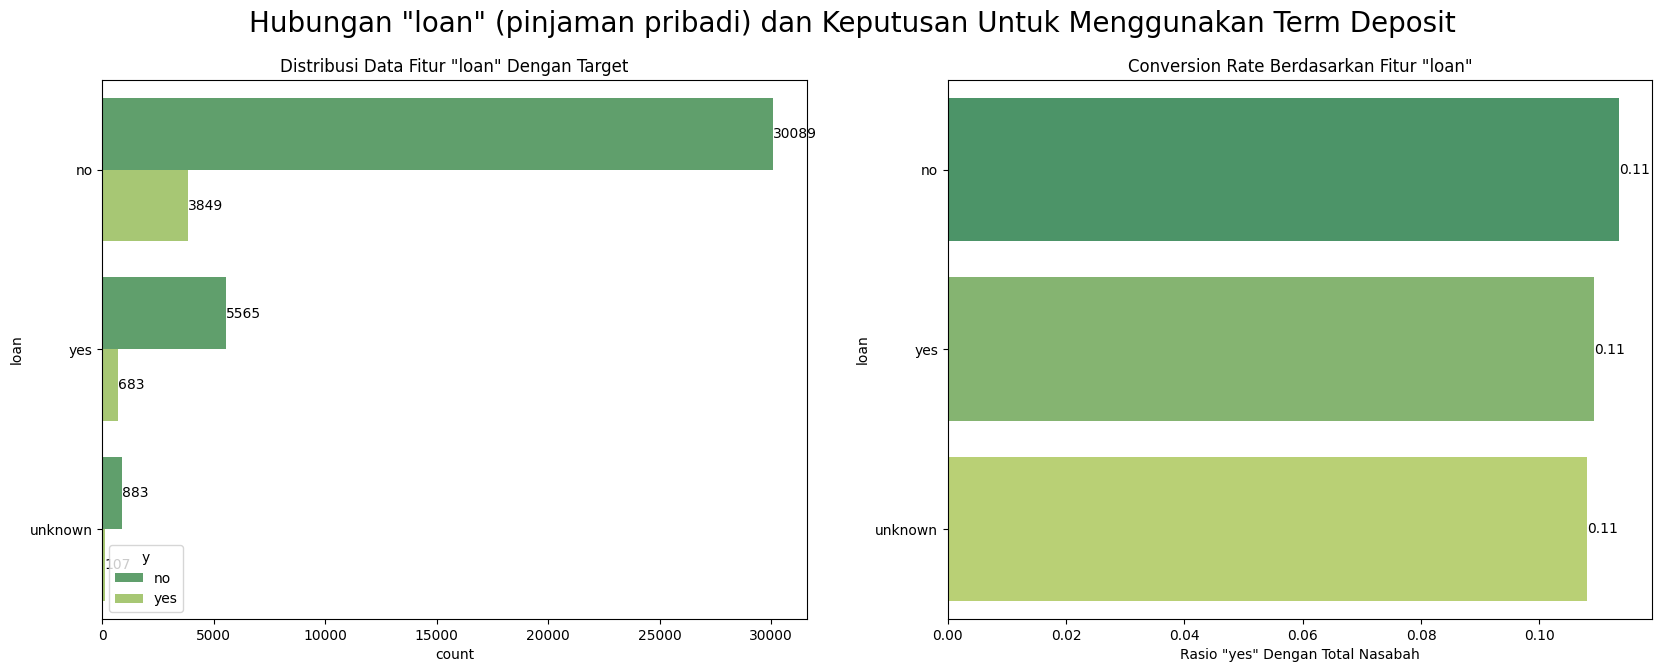

In [336]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "loan" (pinjaman pribadi) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['loan','age']].groupby(['loan'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['loan','age']].groupby(['loan']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur loan dengan Target
axes[0].set_title('Distribusi Data Fitur "loan" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'loan', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['loan'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='loan', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['loan'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "loan"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

**Insight:**

Berdasarkan grafik di atas, pada visualisasi conversion rate, tidak terlihat perbedaan yang signifikan. Walaupun demikian, dapat disimpulkan bahwa individu yang tidak mengambil pinjaman memiliki conversion rate yang sedikit lebih tinggi. Untuk menguji hubungan antara pengambilan pinjaman oleh seseorang dan kemungkinan mereka melakukan deposito jangka panjang, akan dilakukan uji hipotesis chi-square:

**"Untuk mengkonfirmasi secara statistik apakah ada hubungan antara pengambilan pinjaman dan kemungkinan seseorang melakukan deposito jangka panjang, akan dilakukan uji hipotesis chi-square."**

In [337]:
df_loan = df[['loan','y']]
df_loan['yes'] = df_loan['y'].apply(lambda x : 1 if x == 'yes' else 0)
df_loan['no'] = df_loan['y'].apply(lambda x : 1 if x == 'no' else 0)
df_loan = df_loan.drop(columns = 'y')
df_loan_chi = df_loan.groupby('loan').sum()
df_loan_chi

,yes,no
loan,,
no,3849,30089
unknown,107,883
yes,683,5565


Hipotesis:

- H0: Tidak ada hubungan antara pengambilan pinjaman dan kecenderungan nasabah untuk melakukan deposito jangka panjang.
- Ha: Terdapat hubungan antara pengambilan pinjaman dan kecenderungan nasabah untuk melakukan deposito jangka panjang.

In [338]:
stat, pvalue, dof, expected = chi2_contingency(df_loan_chi)

# Kesimpulan:
if pvalue > 0.05:
    print(f'''
          Nilai p-value = {pvalue:.5f}. p-value > 0.05. kesimpulan adalah tidak dapat menolak H0.
            Kita tidak memiliki bukti cukup untuk menyatakan bahwa antara pengambilan pinjaman dan hasil akhir terdapat hubungan (independen)
          (proporsi keduanya tidak berbeda secara signifikan)
          ''')
else:
    print(f'''
          Nilai p-value = {pvalue:.5f}. p-value <= 0.05. kesimpulan adalah  berhasil menolak H0.
          Kita memiliki bukti cukup untuk menyatakan bahwa antara pengambilan pinjaman dan hasil akhir terdapat hubungan (dependen)
          (proporsi keduanya berbeda secara signifikan)
          ''')



          Nilai p-value = 0.57715. p-value > 0.05. kesimpulan adalah tidak dapat menolak H0.
            Kita tidak memiliki bukti cukup untuk menyatakan bahwa antara pengambilan pinjaman dan hasil akhir terdapat hubungan (independen)
          (proporsi keduanya tidak berbeda secara signifikan)
          


**Insight:**

Dari data di atas, dapat disimpulkan bahwa tidak terdapat hubungan antara pengambilan pinjaman oleh seseorang dan kemungkinan mereka untuk melakukan deposito jangka panjang. Hasil ini didukung oleh nilai p-value yang sangat besar, yang menunjukkan bahwa tidak ada hubungan yang signifikan antara kedua variabel ini. 

Meskipun berdasarkan pengetahuan umum, kita mungkin mengharapkan bahwa pengambilan pinjaman akan berpengaruh karena orang yang memiliki pinjaman mungkin mencari return yang lebih tinggi daripada yang dapat diberikan oleh deposito, namun hasil uji statistik menunjukkan sebaliknya. Hal ini menunjukkan bahwa dalam dataset ini, pengambilan pinjaman dan kecenderungan untuk melakukan deposito jangka panjang tidak berkaitan secara signifikan.

### **1.2 Analisis Metode Kontak Yang Dilakukan** (`contact`, `month`, `day_of_week`, `duration`)

#### **1.2.1 Fitur `contact`**

Pada fitur contact akan dilakukan pengecekan untuk persebaran data dan conversion rate pada fitur **`contact`**

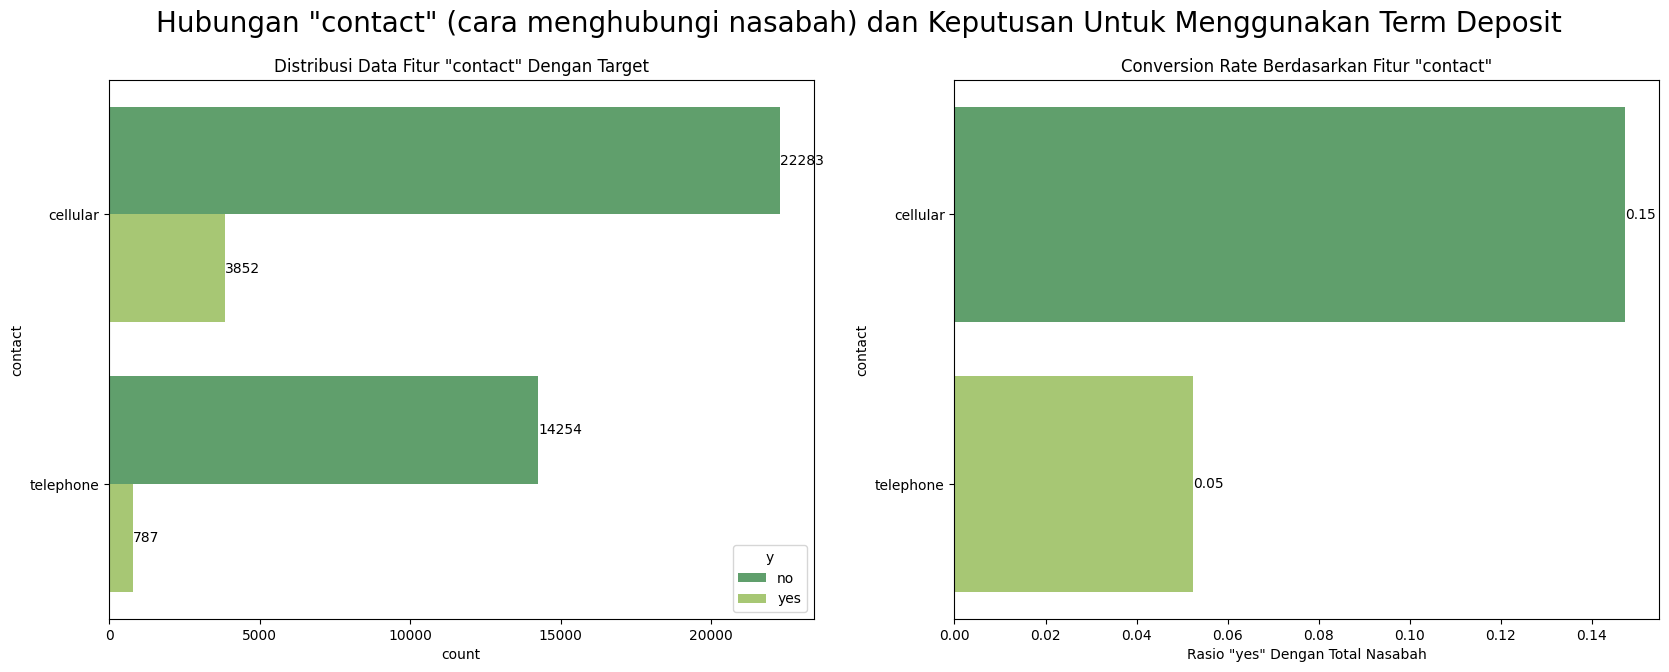

In [339]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "contact" (cara menghubungi nasabah) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['contact','age']].groupby(['contact'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['contact','age']].groupby(['contact']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur contact dengan Target
axes[0].set_title('Distribusi Data Fitur "contact" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'contact', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['contact'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='contact', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['contact'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "contact"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

**Insight :**

Dari grafik di atas, dapat ditarik kesimpulan bahwa bank telah mengambil pendekatan yang efektif dengan lebih sering menghubungi nasabah melalui nomor ponsel (cellular) dibandikan menggunakan nomor telepon. Ini terlihat dari conversion rate yang lebih tinggi bagi nasabah yang dihubungi melalui nomor ponsel, yang sekitar tiga kali lebih tinggi pada conversion ratenya bagi nasabah yang dihubungi melalui telepon. 
Untuk rekomendasi ke depan, mengingat conversion rate yang sangat rendah bagi nasabah yang dihubungi melalui telepon (hanya sekitar 5%), akan lebih baik memprioritaskan pada penggunaan nomor ponsel saat menghubungi nasabah.

#### **1.2.2 Fitur `month`**

Pada fitur contact akan dilakukan pengecekan untuk persebaran data pada fitur **`month`**

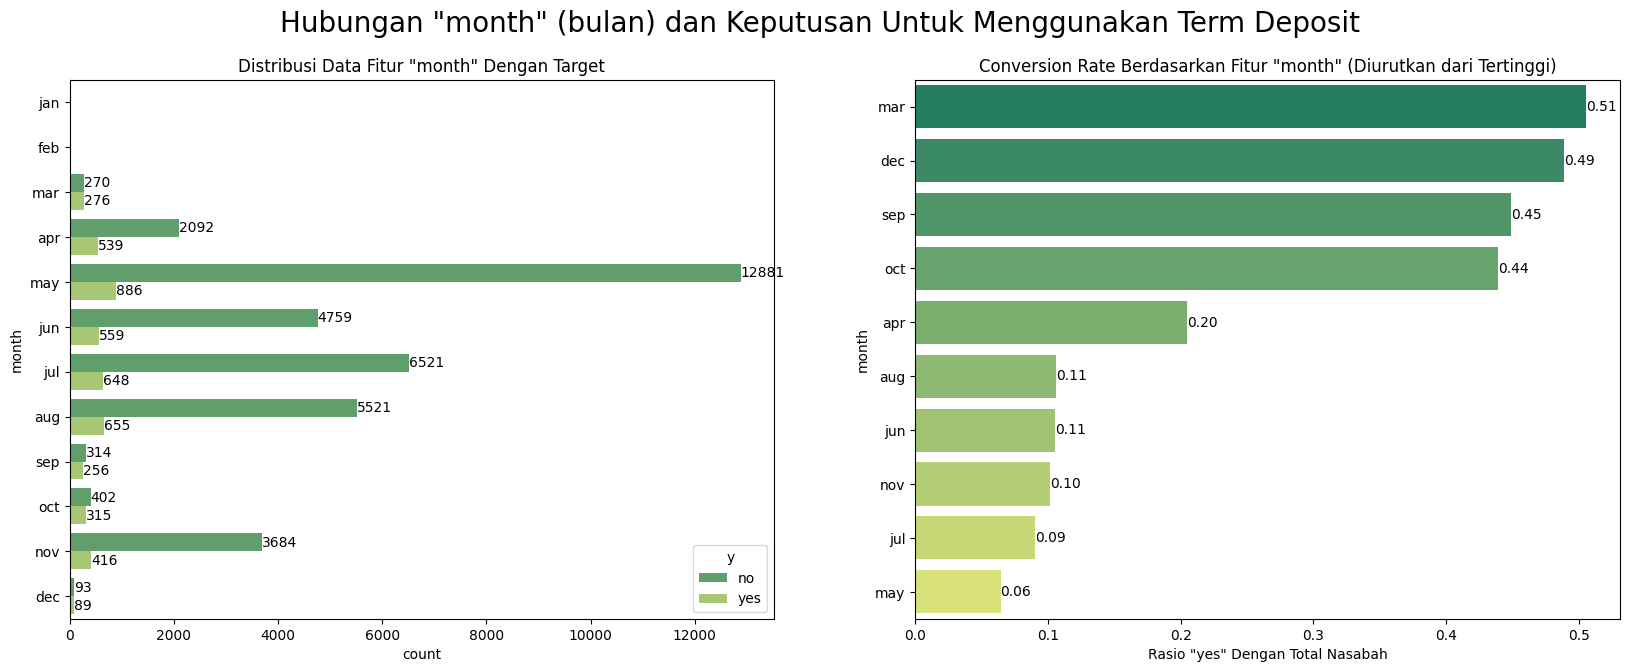

In [340]:
# Mendefinisikan urutan bulan dari Januari ke Desember
bulan_urutan = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Hubungan "month" (bulan) dan Keputusan Untuk Menggunakan Term Deposit', size=20)

# Conversion Rate
dfratio = df[['month', 'age']].groupby(['month'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['month', 'age']].groupby(['month']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False, inplace=True)

# Grafik Distribusi fitur month dengan Target (diurutkan)
axes[0].set_title('Distribusi Data Fitur "month" Dengan Target')
plot1 = sns.countplot(hue='y', y='month', data=df, order=bulan_urutan, ax=axes[0], palette="summer")

# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate (diurutkan dari tertinggi)
plot2 = sns.barplot(data=dfratio, y='month', x='ratio', order=dfratio.sort_values('ratio', ascending=False)['month'], ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "month" (Diurutkan dari Tertinggi)')

# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')

# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()


**Insight :**

Dari grafik di atas, terlihat bahwa ada perbedaan yang signifikan dalam conversion rate berdasarkan hari dalam seminggu di mana nasabah terakhir kali dihubungi. Bulan tertentu, seperti `Maret, September, Oktober, dan Desember`, memiliki conversion rate yang lebih tinggi, meskipun jumlah nasabah yang dihubungi pada hari-hari ini relatif sedikit (hanya sekitar 5% dari total kontak). Di sisi lain, bulan Mei memiliki jumlah kontak yang tinggi, namun conversion ratenya rendah, menunjukkan bahwa banyak upaya kontak pada bulan tersebut mungkin tidak efektif.

Rekomendasi yang dapat diambil dari insight ini adalah bank dapat mempertimbangkan untuk meningkatkan upaya kontak pada hari-hari dengan conversion rate tinggi dan mengurangi frekuensi kontak pada bulan Mei. Selain itu, meratakan frekuensi kontak selama setiap bulan juga bisa menjadi strategi yang baik untuk membandingkan conversion rate secara lebih objektif. Hal ini akan membantu bank dalam pengelolaan sumber daya untuk akuisisi nasabah dengan lebih efisien.

Perlu dilakukan analisis juga mengapa pada bank tersebut mengapa hanya melakukan kampanye cenderung pada bulan-bulan tertetu. Bahkan pada bulan Januari dan Februari terlihat tidak ada dilakukannya campaign terhadap nasabah untuk deposito. Untuk menganalisa hal tersebut kita gunakan pengecekan melalui alah satu indikator ekonomi yaitu euribor terhadap fitur month.

EURIBOR adalah singkatan dari "Euro Interbank Offered Rate." EURIBOR adalah suku bunga acuan yang digunakan dalam pasar keuangan Eropa. Ini adalah suku bunga yang digunakan sebagai referensi untuk berbagai produk keuangan, terutama untuk pinjaman dan derivatif keuangan di wilayah euro. EURIBOR digunakan sebagai patokan untuk menentukan suku bunga yang harus dibayarkan atau diterima dalam berbagai transaksi keuangan.
EURIBOR dihitung berdasarkan suku bunga yang dilaporkan oleh sejumlah bank di zona euro. Setiap bank yang berpartisipasi dalam proses ini memberikan tingkat suku bunga yang mereka anggap akan diberikan jika mereka meminjamkan uang kepada bank lain untuk jangka waktu tertentu. Hasil dari laporan ini kemudian dihitung menjadi suku bunga EURIBOR. EURIBOR digunakan untuk berbagai tujuan, termasuk Penentuan suku bunga pinjaman, penilaian investasi, penentuan harga dan risiko derivatif, manajemen risiko perusahaan, perencanaan keuangan.
Penting untuk diingat bahwa ada berbagai jangka waktu EURIBOR, seperti 1 bulan, 3 bulan, 6 bulan, dan 12 bulan, yang dapat digunakan dalam berbagai jenis transaksi dan kontrak. EURIBOR menjadi salah satu indikator penting dalam pasar keuangan Eropa dan berperan dalam menentukan biaya pinjaman dan penilaian risiko di wilayah euro.

In [341]:
df_month_euribor = df[['euribor3m','month']].groupby('month',as_index=False).mean().reindex([5,0,6,4,3,1,9,8,7,2])
df_month_euribor

,month,euribor3m
5,mar,1.162745
0,apr,1.361047
6,may,3.293696
4,jun,4.256908
3,jul,4.686026
1,aug,4.300408
9,sep,0.834760
8,oct,1.200762
7,nov,3.723018
2,dec,0.865319


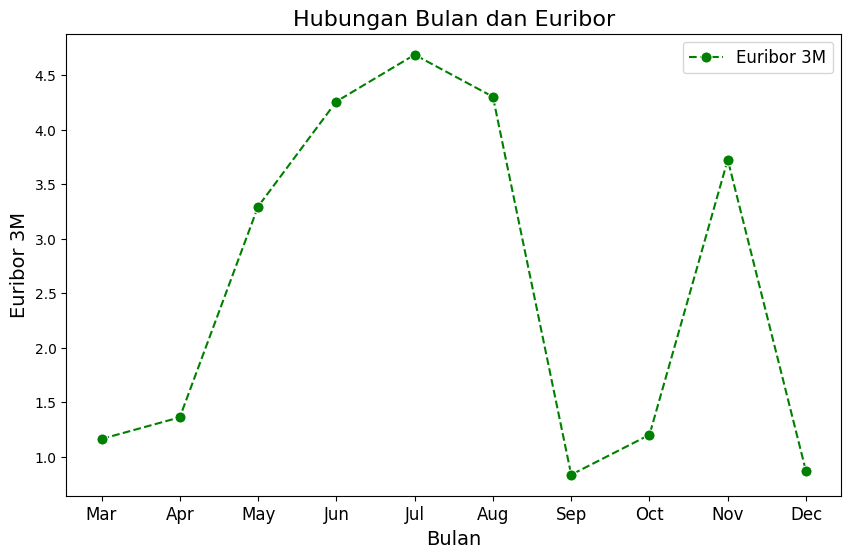

In [342]:
# Visualisasi sebaran data terhadap target serta conversion rate
plt.figure(figsize=(10, 6))
plt.title('Hubungan Bulan dan Euribor', fontsize=16)

# Mengatur warna garis menjadi hijau
sns.lineplot(data=df_month_euribor, x='month', y='euribor3m', color='green', linestyle='dashed', marker='o', markersize=8, label='Euribor 3M')

# Mengatur label pada sumbu x sesuai dengan nama bulan
plt.xticks(range(10), ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Menambahkan label untuk sumbu x dan y
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Euribor 3M', fontsize=14)

# Menambahkan legenda
plt.legend(fontsize=12)

plt.show()


**Insight :**

Dari informasi grafik di atas, terlihat bahwa bank cenderung kurang aktif dalam menghubungi nasabah ketika suku bunga Euribor rendah, yang menunjukkan situasi ekonomi yang stabil. Ini mungkin disebabkan oleh anggapan bahwa pada kondisi seperti ini, nasabah mungkin enggan untuk menginvestasikan uangnya dalam produk deposito dan lebih mungkin mencari instrumen investasi lain yang lebih menguntungkan. Namun, data conversion rate justru menunjukkan hasil yang berbeda. Ketika suku bunga Euribor rendah, konversi nasabah ke produk deposito tetap cukup tinggi.

Oleh karena itu, ada saran untuk bank untuk lebih aktif dalam menghubungi nasabah, terutama pada bulan-bulan ketika suku bunga rendah, dengan harapan untuk meningkatkan conversion rate. Alternatifnya, bank bisa mencoba strategi yang konsisten dalam menghubungi nasabah setiap bulan, sehingga hasil conversion rate dapat dibandingkan dengan lebih baik dalam periode yang sama.

#### **1.2.3 Fitur `day_of_week`**

Pada fitur contact akan dilakukan pengecekan untuk persebaran data pada fitur **`day_of_week`**

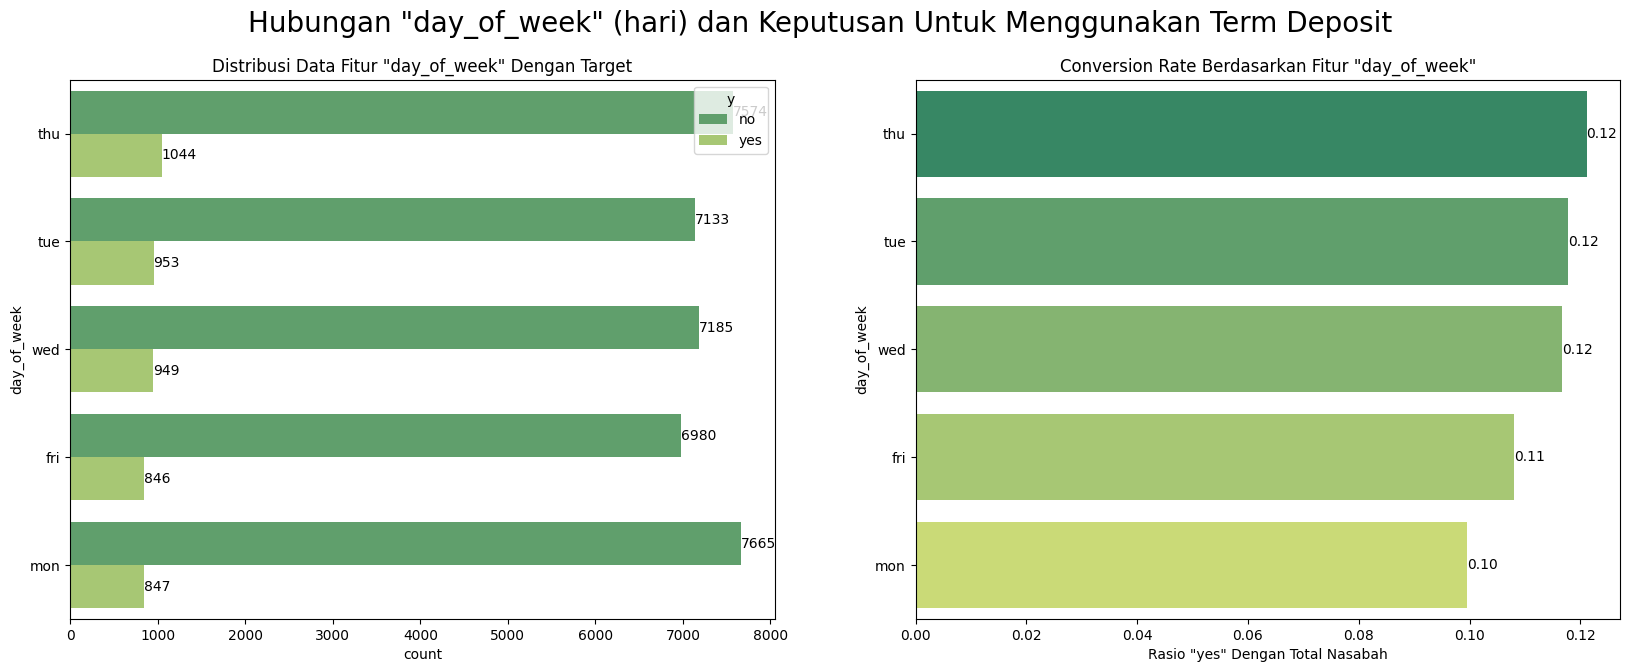

In [343]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "day_of_week" (hari) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['day_of_week','age']].groupby(['day_of_week'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['day_of_week','age']].groupby(['day_of_week']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur day_of_week dengan Target
axes[0].set_title('Distribusi Data Fitur "day_of_week" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'day_of_week', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['day_of_week'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='day_of_week', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['day_of_week'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "day_of_week"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

**Insight:**

Dari data di atas, kita bisa melihat bahwa perbedaan dalam conversion rate dari kontak terakhir pada hari kerja tidak memiliki perbedaan yang signifikan. Namun, secara keseluruhan, kita dapat menyimpulkan bahwa "conversion rate tertinggi terjadi ketika kontak terakhir dilakukan pada hari Kamis." Dari segi jumlah kontak yang dilakukan kepada nasabah, terlihat bahwa jumlahnya cukup merata setiap harinya, menunjukkan konsistensi dalam produktivitas Bank dalam menghubungi nasabah.

Untuk menentukan apakah ada pengaruh yang signifikan dari hari kerja terhadap kecenderungan konsumen untuk menerima term deposit, akan dilakukan uji hipotesis chi-test.

**Hipotesis:**

- Ho (Hipotesis Nol): Tidak ada hubungan antara hari kontak terakhir dengan kecenderungan nasabah untuk melakukan term deposit.
- Ha (Hipotesis Alternatif): Terdapat hubungan antara hari kontak terakhir dengan kecenderungan nasabah untuk melakukan term deposit.

In [344]:
# Mengganti nama variabel dan DataFrame
df_day_of_week = df[['day_of_week', 'y']]
df_day_of_week['yes_count'] = df_day_of_week['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_day_of_week['no_count'] = df_day_of_week['y'].apply(lambda x: 1 if x == 'no' else 0)
df_day_of_week = df_day_of_week.drop(columns='y')
df_day_of_week_counts = df_day_of_week.groupby('day_of_week').sum()
df_day_of_week_counts

,yes_count,no_count
day_of_week,,
fri,846,6980
mon,847,7665
thu,1044,7574
tue,953,7133
wed,949,7185


In [345]:
stat, pvalue, dof, expected = chi2_contingency(df_day_of_week_counts)
# conclusion :
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. Tidak cukup bukti untuk menolak Hipotesis Nol (Ho).
          Tidak ada hubungan yang signifikan antara hari kontak terakhir dan kecenderungan nasabah untuk melakukan term deposit.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. Cukup bukti untuk menolak Hipotesis Nol (Ho).
          Terdapat hubungan yang signifikan antara hari kontak terakhir dan kecenderungan nasabah untuk melakukan term deposit.
          ''')



          p-value = 0.00003. Cukup bukti untuk menolak Hipotesis Nol (Ho).
          Terdapat hubungan yang signifikan antara hari kontak terakhir dan kecenderungan nasabah untuk melakukan term deposit.
          


**Insight:**

Data di atas mengindikasikan bahwa terdapat hubungan antara hari terakhir kontak dengan nasabah dan kecenderungan nasabah untuk melakukan deposit. Berdasarkan visualisasi grafik, direkomendasikan untuk meningkatkan panggilan pada hari Kamis, karena ini terkait dengan conversion rate yang lebih tinggi.

#### **1.2.4 Fitur `duration`**

Pada fitur contact akan dilakukan pengecekan untuk persebaran data pada fitur **`duration`**. Pada part sebelumnya kita telah melakukan grouping kolom `duration` kedalam kolom `call category` agar lebih mudah dalam mencari hubungan seberapa besar kolom tersebut mempengaruhi kecenderungan nasabah dalam melakukan term of deposite kita lakukan analisa dengan cara berikut :

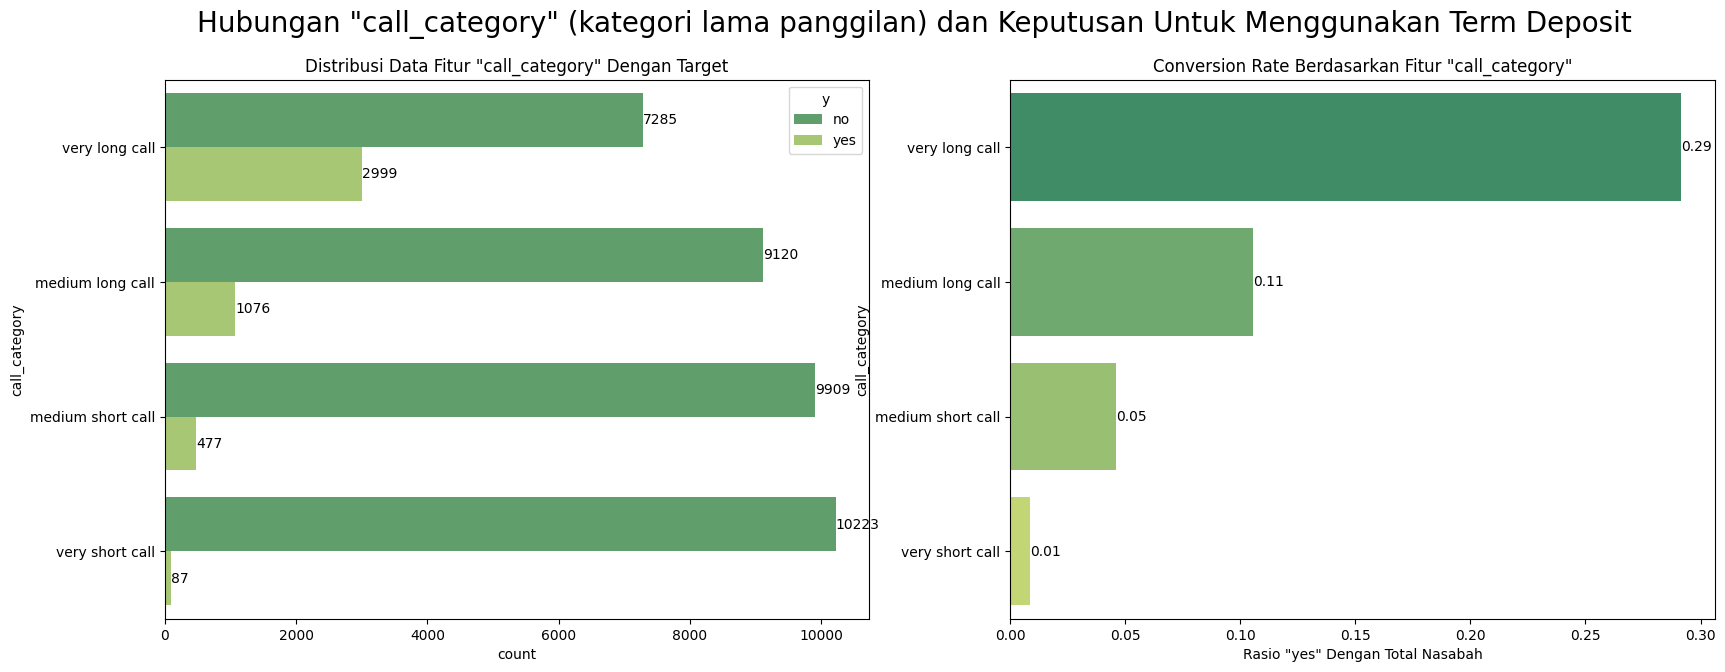

In [346]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "call_category" (kategori lama panggilan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['call_category','duration']].groupby(['call_category'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['call_category','duration']].groupby(['call_category']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['duration']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur call_category dengan Target
axes[0].set_title('Distribusi Data Fitur "call_category" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'call_category', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['call_category'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='call_category', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['call_category'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "call_category"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

**Insight :**

Dapat disimpulkan dari grafik diatas bahwa kecenderungan nasabah untuk bergabung dengan program term of deposit lebih besar saat menerima campaign dengan durasi lama (**`very long call`)**, setelah itu disusul dengan besaran conversion rate **`medium long call`, `medium short call`** selanjutnya pada posisi terakhir **`very short call`** dengan conversion rate yang paling rendah. Sehingga untuk sebagai himbauan kepada karyawan yang melakukan campaign bahwa seharusnya lebih baik melakukan call dengan waktu yang tidak terlalu singkat sehingga dapat menjelaskan produk layanan bank term deposit dengan lebih baik, baik dari sisi kemudahan dalam melakukan term of deposit ataupun keuntungan yang didapatkan oleh pelanggan jika bergabung dalam program tersebut.

### **1.3 Analisis Hasil Campaign Sebelumnya** (`campaign`, `pdays`, `previous`, `poutcome`)

#### **1.3.1 Fitur `campaign`**

Pada fitur campaign, pertama kita akan cek pesebaran nilai dan kita uji normalitas data, apakah data berdistribusi normal atau tidak

<Figure size 1500x2000 with 0 Axes>

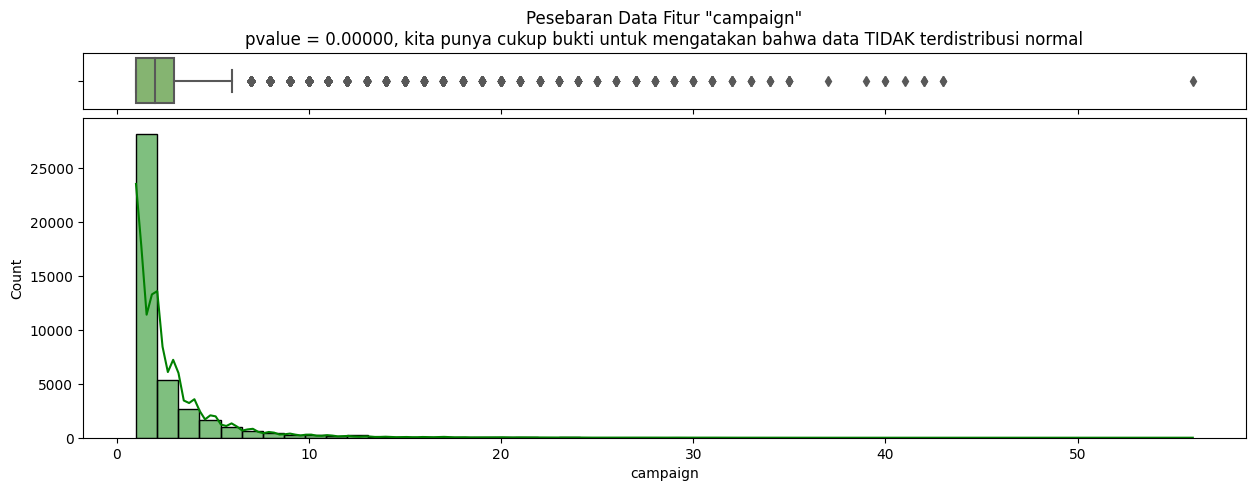

In [347]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["campaign"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "campaign"\n{distribusi}""", color = "black")
sns.boxplot(x = df["campaign"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["campaign"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu nasabah yang dikontak selama campaign sebanyak kurang dari 10 kali 
* Karena data ber-distribusi tidak normal. Maka, untuk mengetahui dimana posisi banyak nilai data terkumpul didalam distribusi (central of tendency) kita akan menggunakan nilai median. Nilai median diperoleh dengan mengurutkan data dari nilai yang terkecil hingga ke nilai yang terbesar, kemudian mencari titik yang membagi data menjadi dua kelompok

Setelah mengetahui ukuran pemusatan data yang akan kita gunakan, selanjutnya kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

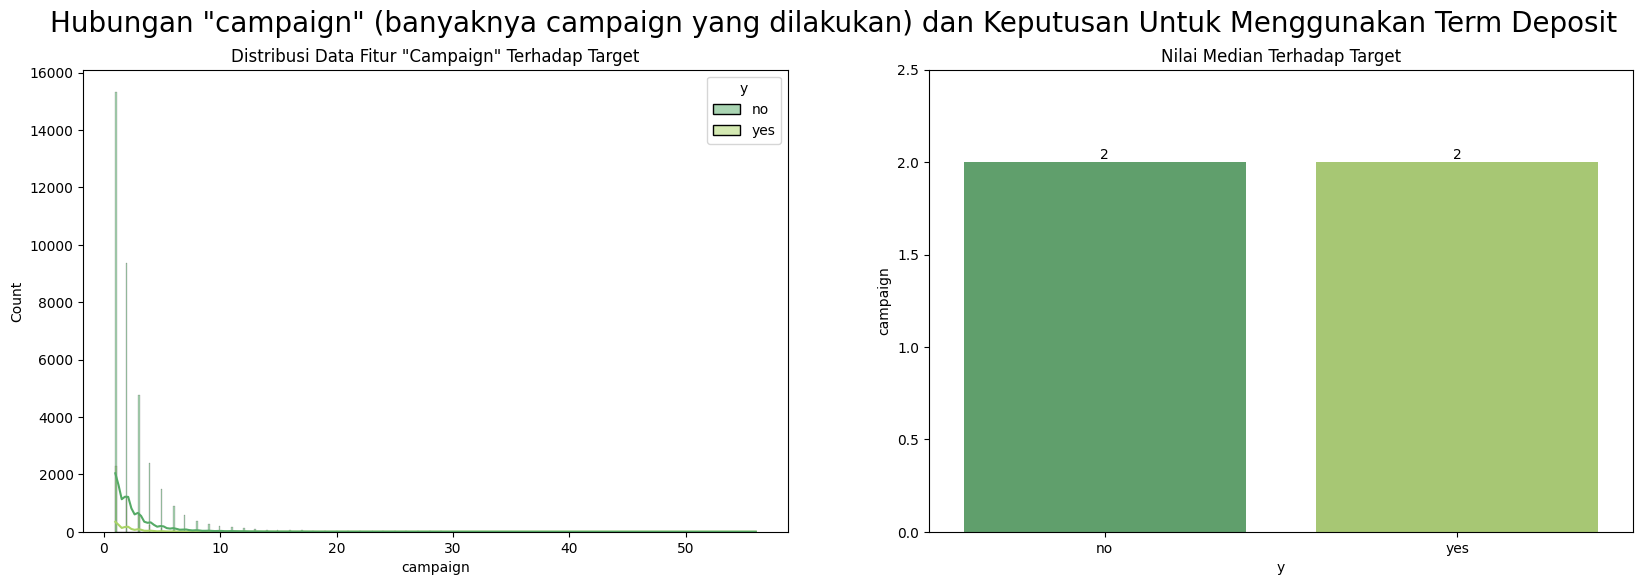

In [348]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "campaign" (banyaknya campaign yang dilakukan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "Campaign" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['campaign'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'campaign', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 2.5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari jumlah kontak yang dilakukan kepada nasabah selama campaign yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `campaign` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data campaign 'Yes' >= Distribusi data campaign 'No'
- Ha : Distribusi data campaign 'Yes' < Distribusi data campaign 'No'

In [349]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['campaign'],
    df[df['y'] == 'no']['campaign'],
    alternative = 'less'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`campaign`" antara nasabah yang menggunakan Term Deposit lebih kecil dibanding dengan nasabah yang tidak menggunakan Term Deposit**. Artinya adalah fitur `campaign` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Setelah kita mengetahui bahwa fitur `campaign` dapat berpengaruh pada keputasan nasabah menggunakan Term Deposit atau tidak, selanjutnya kita akan melihat hubungan antar fitur campaign dan duration dengan fitur target untuk melihat efisiensi jumlah kontak panggilan dengan calon nasabah menggunakan Scatter Plot berikut:

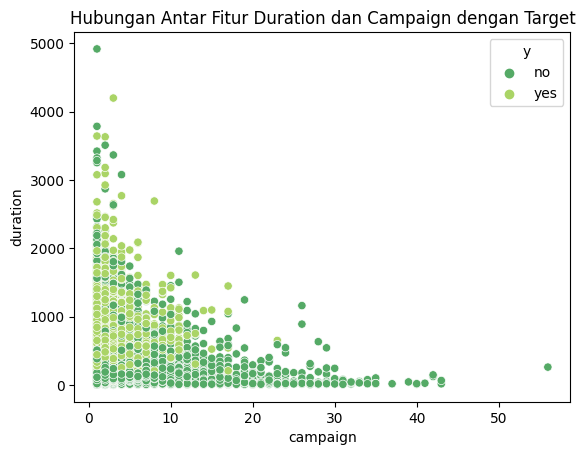

In [350]:
# Scatter plot hubungan fitur duration, campaign dengan target

plt.title('Hubungan Antar Fitur Duration dan Campaign dengan Target')
sns.scatterplot(data=df, x = 'campaign', y = 'duration', hue='y', palette="summer")
plt.show()

__Insight:__

Dari scatter plot diatas bisa kita lihat bahwa nasabah yang menggunakan term deposit cukup dikontak **maksimal 20 kali** saja, nasabah yang dikontak **lebih dari 20 kali** cenderung tidak tertarik lagi dengan produk yang ditawarkan. Hal ini masuk akal, karena ketika kita dikontak **lebih dari 20 kali** kita cenderung akan menganggap itu sebagai panggilan spam

#### **1.3.2 Fitur `pdays`**

<Figure size 1500x2000 with 0 Axes>

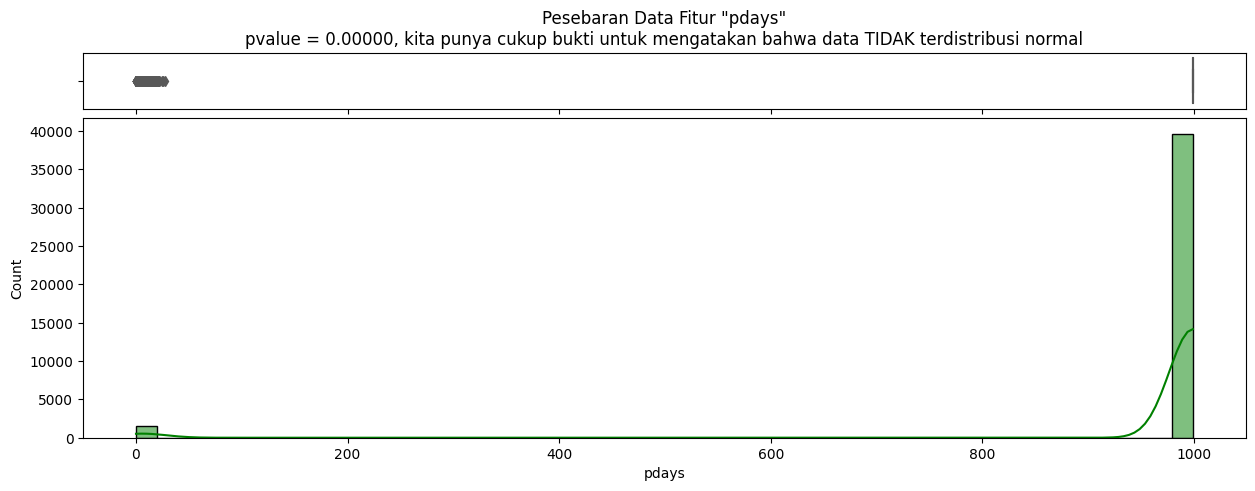

In [351]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["pdays"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "pdays"\n{distribusi}""", color = "black")
sns.boxplot(x = df["pdays"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["pdays"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kiri (Left-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai tertinggi-nya yaitu kategori "**999**" atau nasabah yang tidak pernah dihubungi dari campaign sebelumnya. 
* Karena data ber-distribusi tidak normal. Maka, untuk mengetahui dimana posisi banyak nilai data terkumpul didalam distribusi (central of tendency) kita akan menggunakan nilai median. Nilai median diperoleh dengan mengurutkan data dari nilai yang terkecil hingga ke nilai yang terbesar, kemudian mencari titik yang membagi data menjadi dua kelompok

Selanjutnya kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

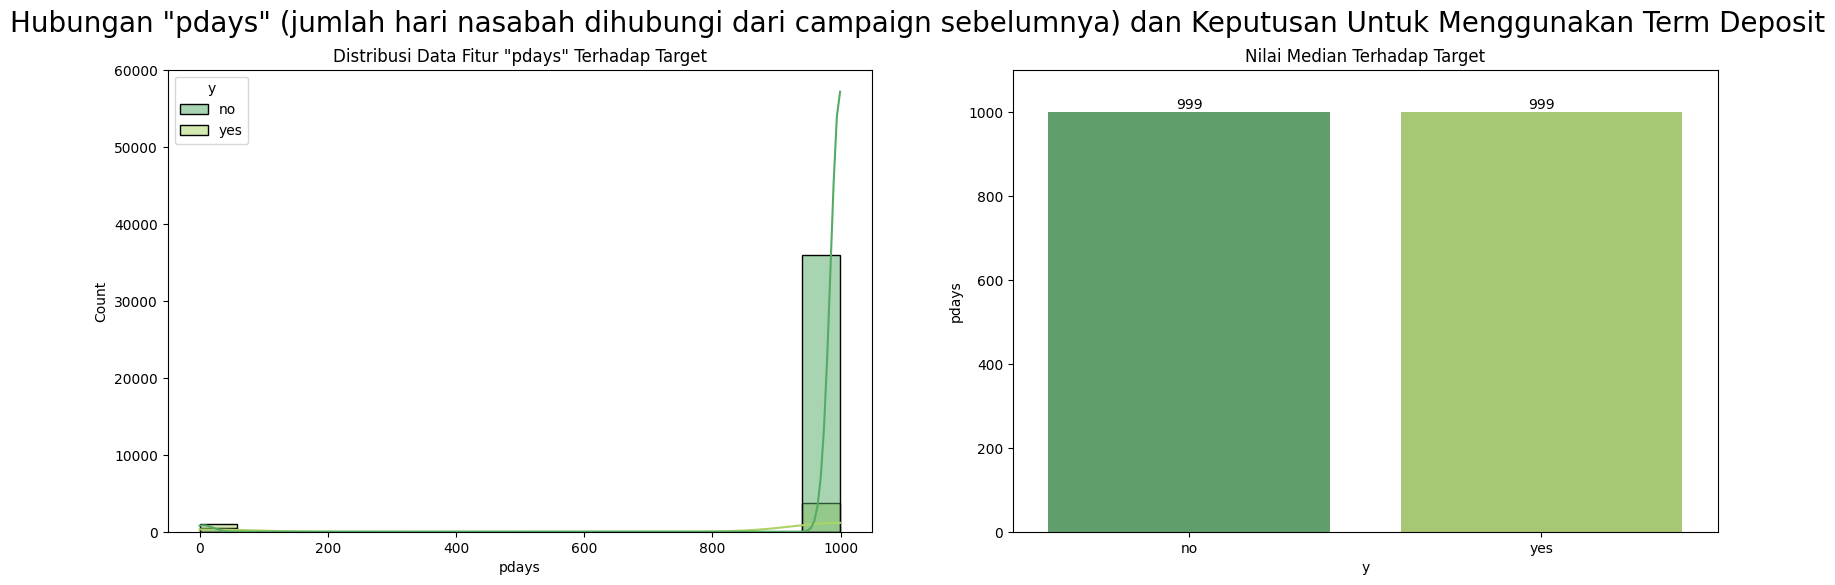

In [352]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "pdays" (jumlah hari nasabah dihubungi dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "pdays" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['pdays'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'pdays', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1100])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas **sulit untuk melihat perbedaan nilai median dari lamanya kontak terakhir yang dilakukan kepada nasabah (dalam hari) yang menggunakan Term Deposit atau tidak**(*masih menggunakan data nasabah yang belum pernah dihubungi sebelumnya "999"*). Maka untuk mengetahui apakah nilai median dari fitur `pdays` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data pdays 'Yes' == Distribusi data pdays 'No'
- Ha : Distribusi data pdays 'Yes' != Distribusi data pdays 'No'

In [353]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['pdays'],
    df[df['y'] == 'no']['pdays'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`pdays`" antara nasabah yang menggunakan Term Deposit dan  yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `pdays` ini **dapat berpengaruh** pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Analisa sebelumnya ialah analisa yang masih menggunakan data nasabah yang tidak pernah dikontak sebelumnya (**kategori "999"**). Sekarang untuk melihat distribusi fitur `pdays` jika nasabah yang tidak pernah dihubungi sebelumnya dihapus dari dataset, dan kita akan mencari insight dari lamanya waktu nasabah terakhir kali dihubungi dengan fitur target, maka kita akan coba menghapus data nasabah yang belum pernah dikontak sebelumnya (kategori "999")

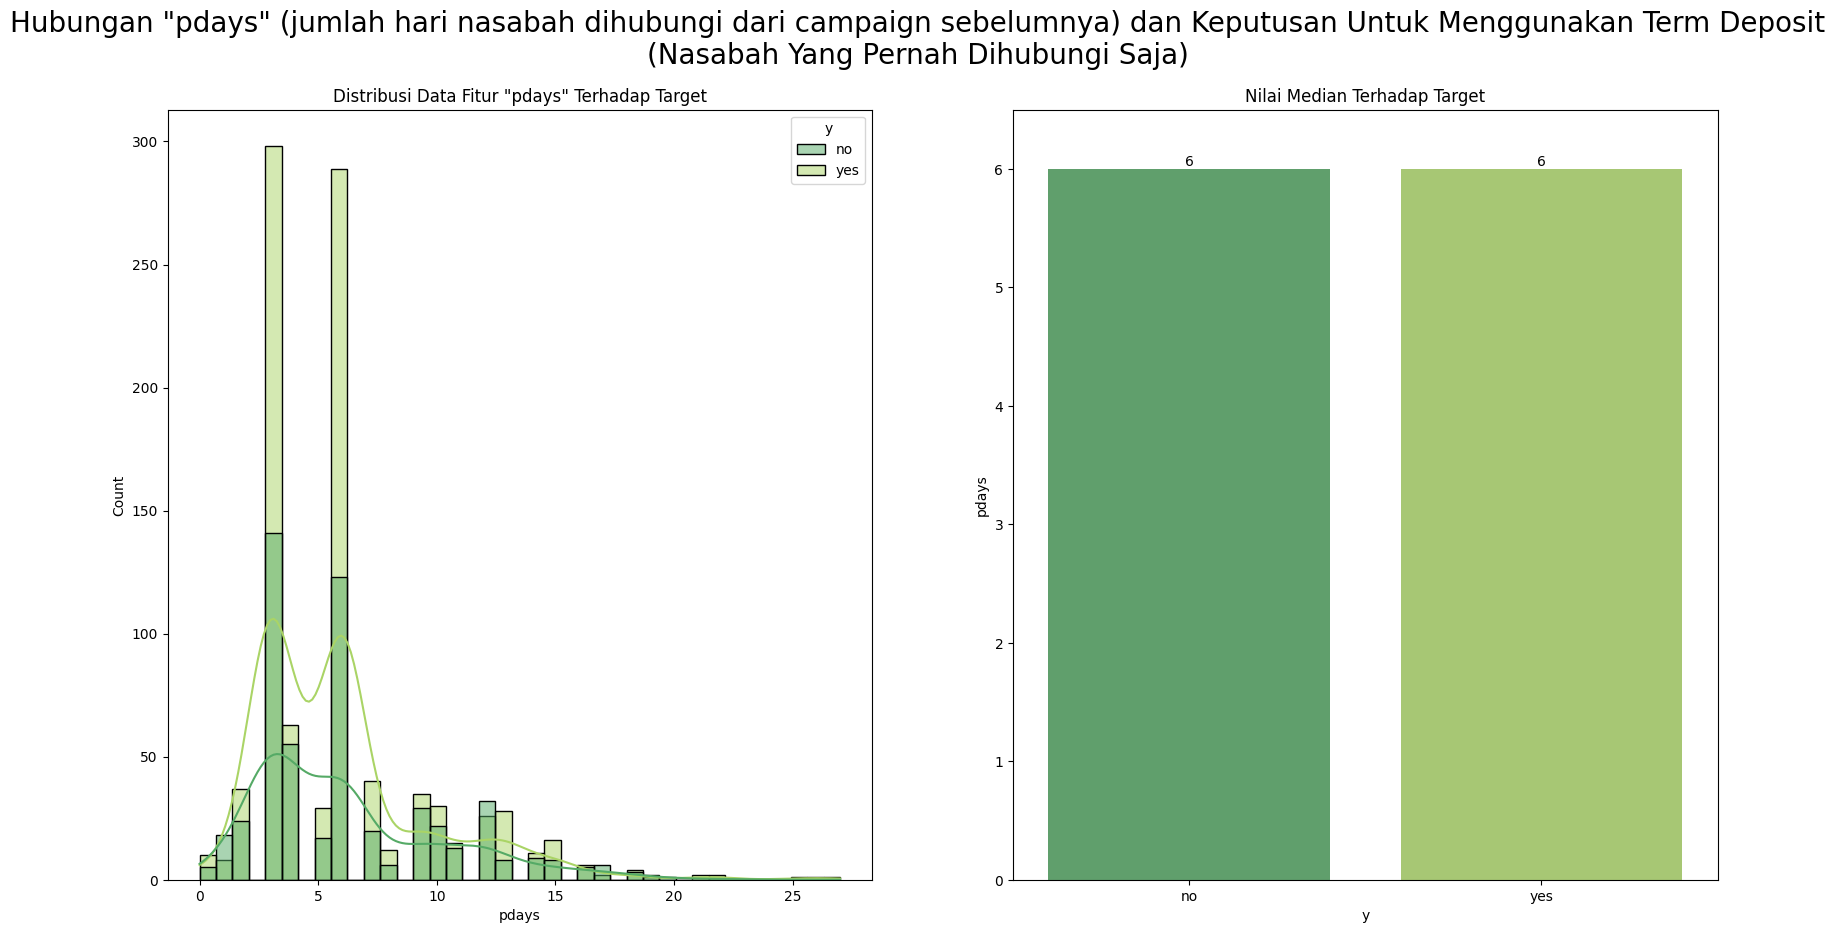

In [354]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target (exclude "999")

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,10))

plt.suptitle('Hubungan "pdays" (jumlah hari nasabah dihubungi dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit\n(Nasabah Yang Pernah Dihubungi Saja)', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "pdays" Terhadap Target')
plot1=sns.histplot(data = df[df['pdays'] != 999], hue = 'y', x = df[df['pdays'] != 999]['pdays'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'pdays', data = df[df['pdays'] != 999], estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 6.5])

plt.show()

__Insight:__

Sama seperti pada grafik sebelumnya. Nilai median terhadap target **sulit untuk dilihat perbedaan nilai median dari lamanya kontak terakhir yang dilakukan kepada nasabah (dalam hari) yang menggunakan Term Deposit atau tidak**(*hanya menggunakan data nasabah yang pernah dihubungi sebelumnya*). Maka untuk mengetahui apakah nilai median dari fitur `pdays` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data pdays nasabah yang pernah dihubungi 'Yes' == Distribusi data pdays nasabah yang pernah dihubungi 'No'
- Ha : Distribusi data pdays nasabah yang pernah dihubungi 'Yes' != Distribusi data pdays nasabah yang pernah dihubungi 'No'

In [355]:
# Uji Hipotesis Mann Whitney

df_without999 = df[df['pdays'] != 999]

stat, pvalue = mannwhitneyu(
    df_without999[df_without999['y'] == 'yes']['pdays'],
    df_without999[df_without999['y'] == 'no']['pdays'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.38457
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita tidak punya cukup bukti untuk mengatakan bahwa distribusi data "`pdays`" antara nasabah yang menggunakan Term Deposit dan  yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `pdays` yang telah menghapus data nasabah yang belum pernah dihubingi ini **tidak berpengaruh** pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **1.3.3 Fitur `previous`**

<Figure size 1500x2000 with 0 Axes>

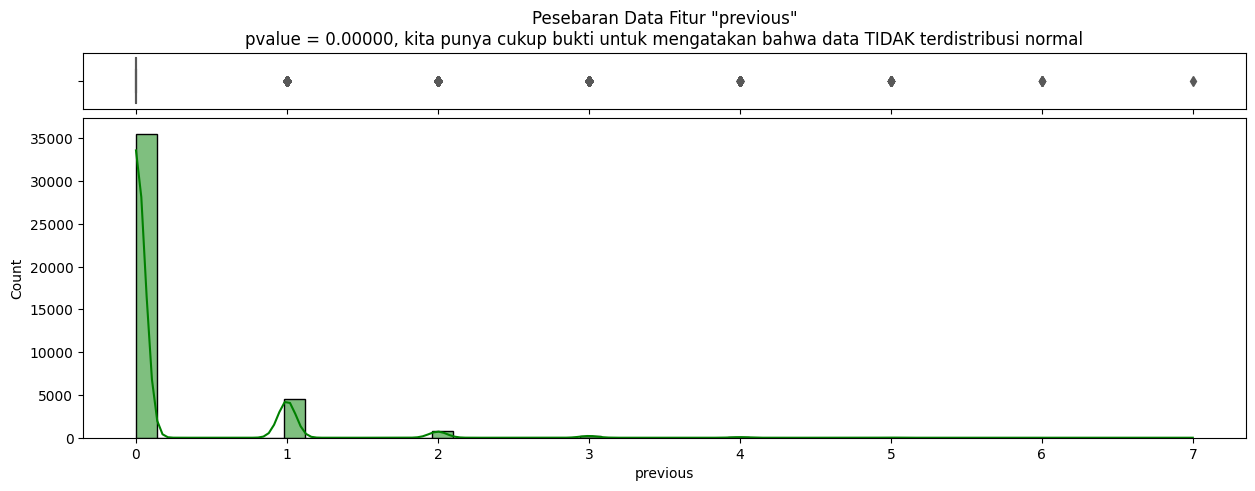

In [356]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["previous"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "previous"\n{distribusi}""", color = "black")
sns.boxplot(x = df["previous"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["previous"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__

Sebagian besar distribusi berada di nilai terendahnya yaitu "**0**", yaitu orang yang tidak dihubungi pada campaign sebelumnya. Hal ini sesuai dengan fitur `pdays` pada pembahasan sebelumnya, dimana pesebaran data tertinggi ada di kategori "**999**" yaitu nasabah yang tidak dihubungi pada campaign sebelumnya.

Selanjutnya kita lihat nilai central of tendency (menggunakan nilai median) pada fitur `previous` ini dengan fitur **target** dan kita cek juga visualisasi pesebaran data dengan targetnya

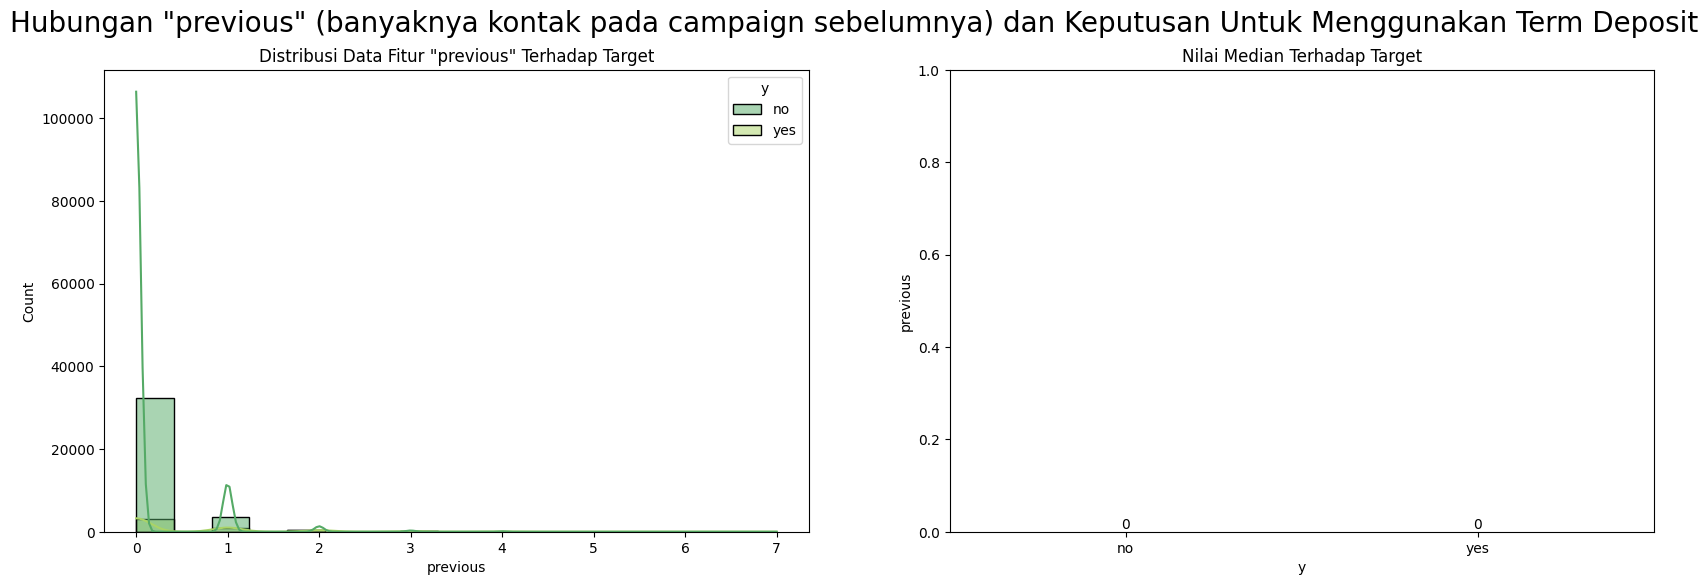

In [357]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "previous" (banyaknya kontak pada campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "previous" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['previous'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'previous', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas, kita sulit untuk melihat perbedaan nilai median dari banyaknya kontak yang dilakukan kepada nasabah pada campaign sebelumnya. Maka untuk mengetahui apakah nilai median dari fitur `previous` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data previous 'Yes' == Distribusi data previous 'No'
- Ha : Distribusi data previous 'Yes' != Distribusi data previous 'No'

In [358]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['previous'],
    df[df['y'] == 'no']['previous'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`previous`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `previous` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Pada analisa sebelumnya masih menggunakan data nasabah yang tidak pernah dihubungi sebelumnya (**kategori "0"**). Sekarang untuk melihat distribusi fitur `previous` jika nasabah yang tidak pernah dihubungi sebelumnya dihapus dari dataset, dan kita akan mencari insight dari banyaknya kontak yang dilakukan kepada nasabah pada campaign sebelumnya dengan fitur target, maka kita akan coba menghapus data nasabah yang tidak pernah dihubungi sebelumnya (kategori "0")

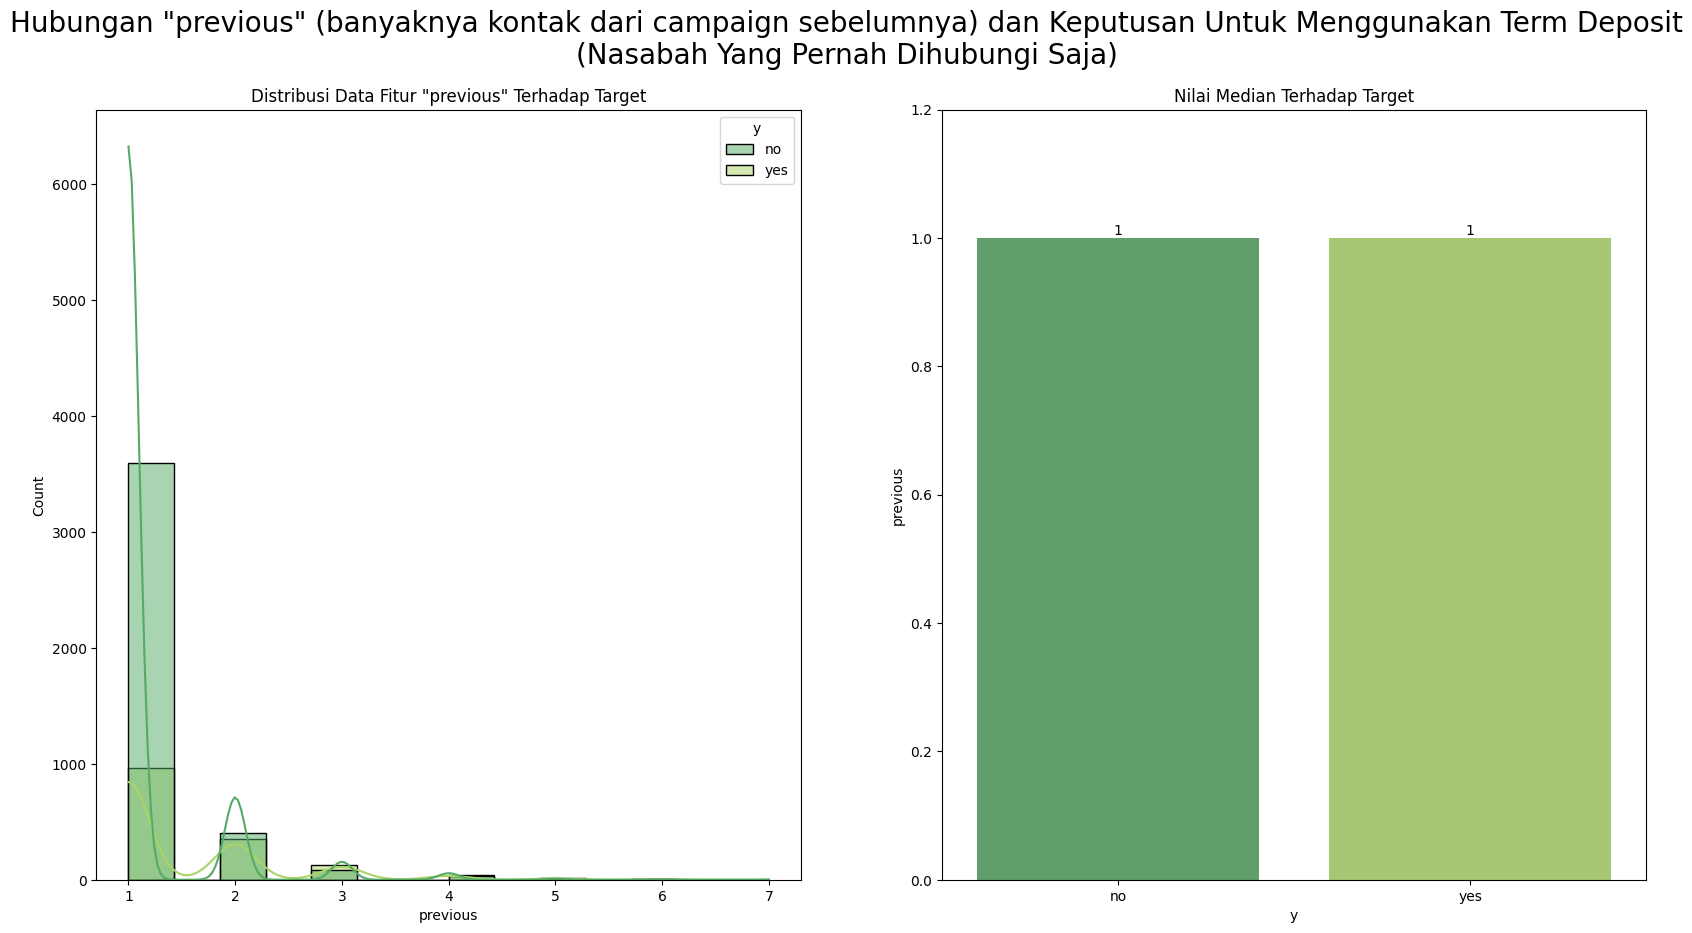

In [359]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target (exclude "0")

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,10))

plt.suptitle('Hubungan "previous" (banyaknya kontak dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit\n(Nasabah Yang Pernah Dihubungi Saja)', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "previous" Terhadap Target')
plot1=sns.histplot(data = df[df['previous'] != 0], hue = 'y', x = df[df['previous'] != 0]['previous'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'previous', data = df[df['previous'] != 0], estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1.2])

plt.show()

__Insight:__

Sama seperti pada grafik sebelumnya. Nilai median terhadap fitur target **sulit untuk dilihat perbedaan nilai median dari jumlah kontak yang dilakukan kepada nasabah yang menggunakan Term Deposit atau tidak**(*hanya menggunakan data nasabah yang pernah dihubungi sebelumnya*). Maka untuk mengetahui apakah nilai median dari fitur `previous` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data previous nasabah yang pernah dihubungi 'Yes' == Distribusi data previous nasabah yang pernah dihubungi 'No'
- Ha : Distribusi data previous nasabah yang pernah dihubungi 'Yes' != Distribusi data previous nasabah yang pernah dihubungi 'No'

In [360]:
# Uji Hipotesis Mann Whitney

df_without0 = df[df['previous'] != 0]

stat, pvalue = mannwhitneyu(
    df_without0[df_without0['y'] == 'yes']['previous'],
    df_without0[df_without0['y'] == 'no']['previous'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`previous`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan** bahkan ketika datanya sudah difilter sebelumnya. Artinya adalah fitur `previous` ini baik masih menggunakan data nasabah yang belum pernah dikontak, maupun nasabah yang sudah pernah dikontak sebelumnya ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **1.3.4 Fitur `poutcome`**

Kita akan melihat hubungan antar fitur `poutcome` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

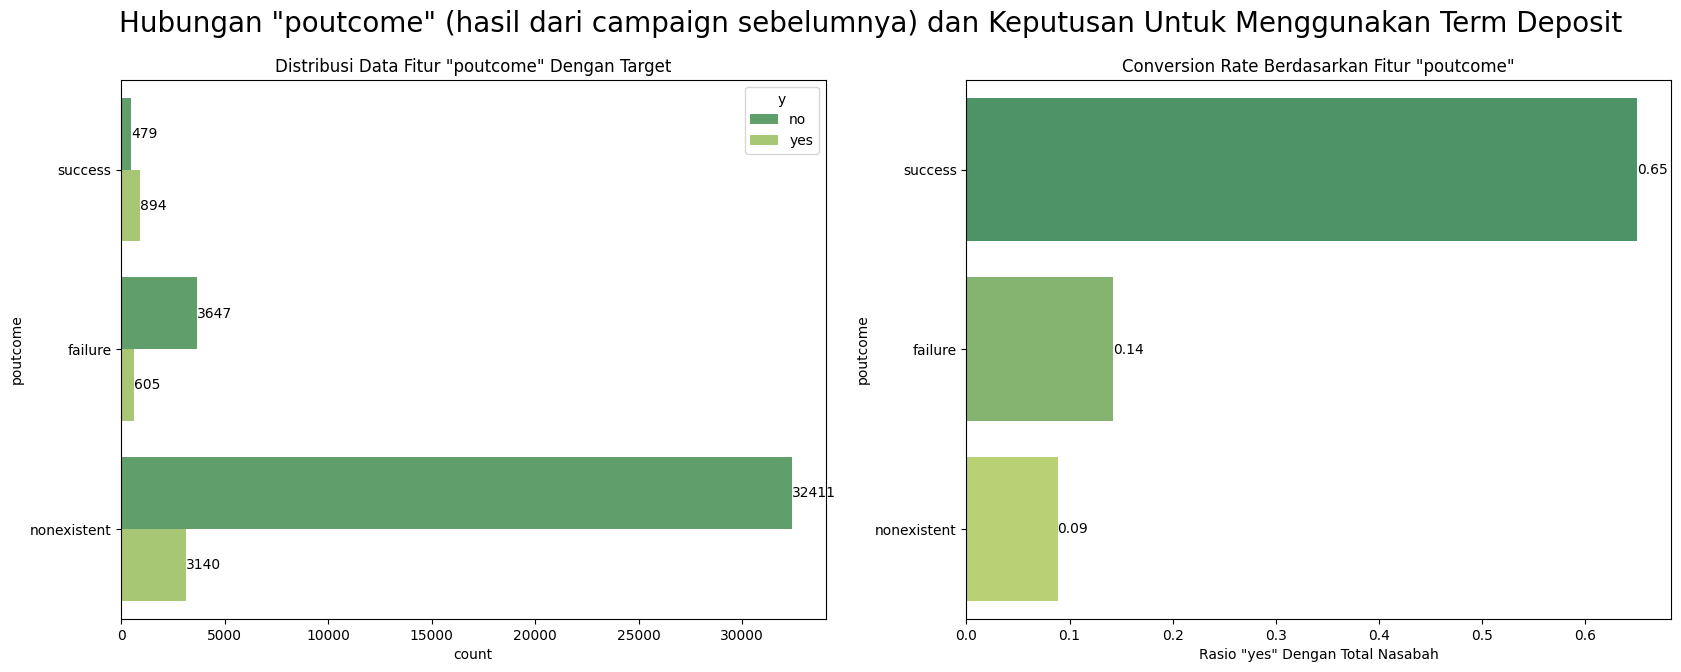

In [361]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "poutcome" (hasil dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['poutcome','age']].groupby(['poutcome'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['poutcome','age']].groupby(['poutcome']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur poutcome dengan Target
axes[0].set_title('Distribusi Data Fitur "poutcome" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'poutcome', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['poutcome'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='poutcome', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['poutcome'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "poutcome"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Kategori terbanyak dari hasil campaign pemasaran sebelumnya ialah **nonexistent (tidak ada)**. Artinya, sebagian besar nasabah merupakan nasabah baru yang belum pernah mendapatkan campaign sebelumnya. Hal ini sesuai dengan analisis beberapa fitur sebelumnya
* Yang perlu diperhatikan disini adalah, nasabah yang sukses pada campaign sebelumnya memiliki CVR tertinggi sebesar **0.65**. Hal ini menandakan bahwa nasabah yang sukses pada campaign sebelumnya ini memiliki kecenderungan yang sangat tinggi untuk menggunakan produk Term Deposit pada campaign berikutnya.

### **1.4 Analisis Data Ekonomi Negara Portugal** (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`)

#### **1.4.1 Fitur `emp.var.rate`**

<Figure size 1500x2000 with 0 Axes>

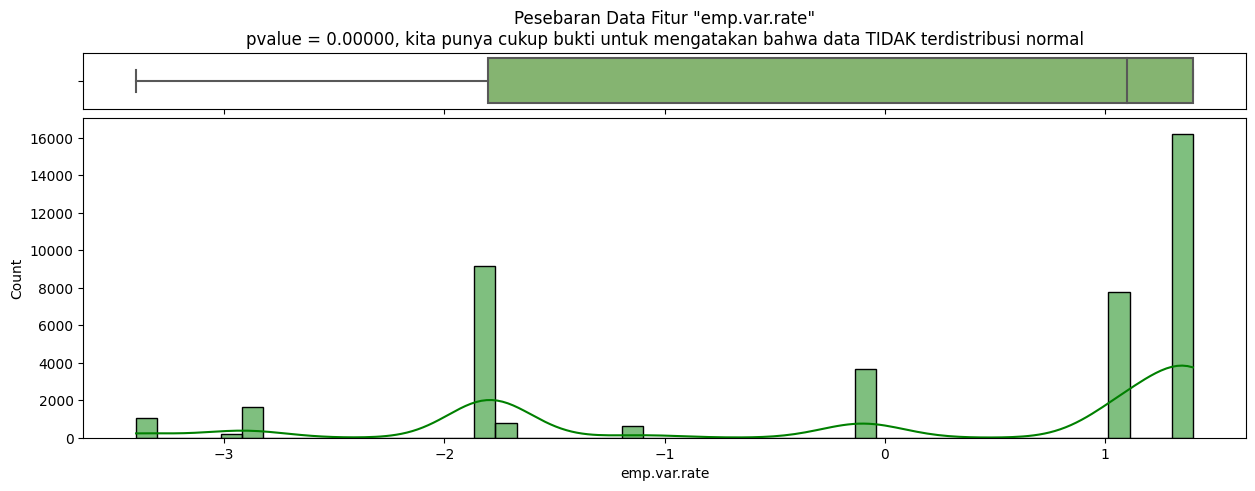

In [362]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["emp.var.rate"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "emp.var.rate"\n{distribusi}""", color = "black")
sns.boxplot(x = df["emp.var.rate"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["emp.var.rate"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu rentang usia 30-45 tahun 
* Nasabah yang paling banyak dihubungi ialah nasabah dengan range usia 30-45 tahun. Hal ini menandakan bank menargetkan calon nasabah dengan rentang usia tersebut dengan harapan usia tersebut meruakan usia yang dianggap sudah matang dari sisi finansial dan sedang dalam masa produktif-nya

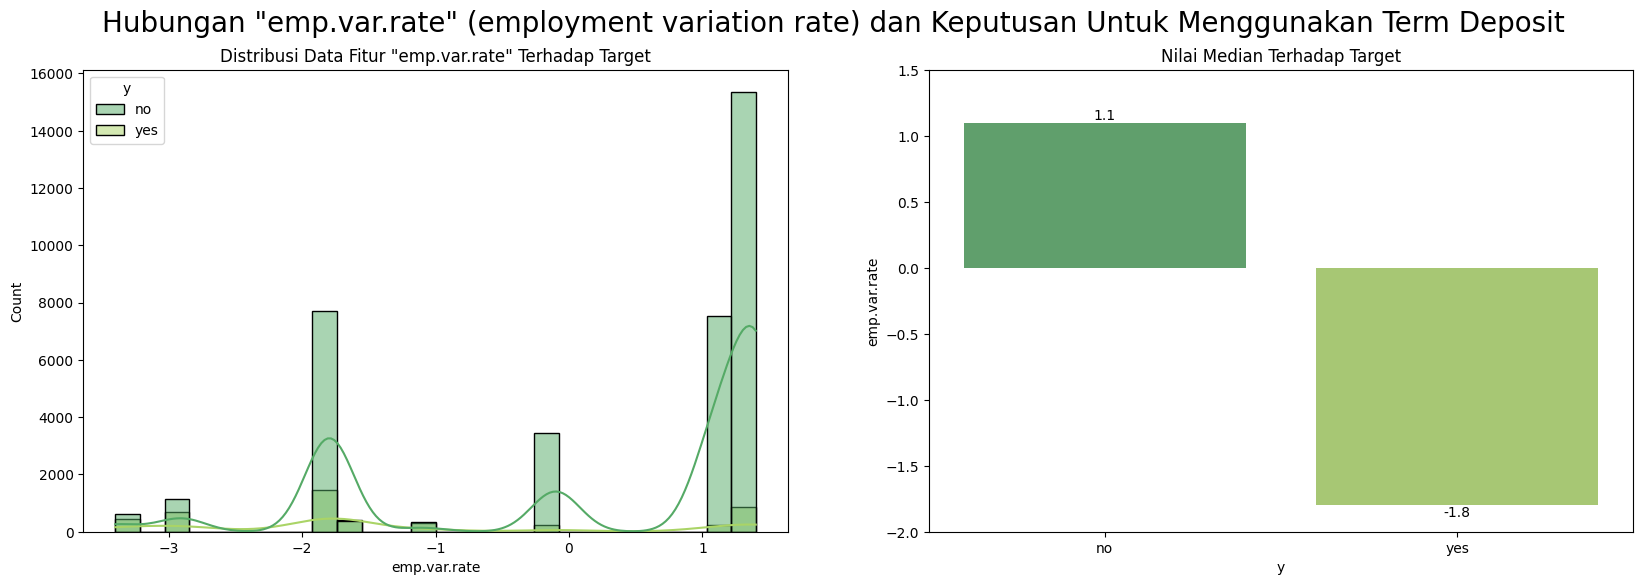

In [363]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "emp.var.rate" (employment variation rate) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "emp.var.rate" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['emp.var.rate'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'emp.var.rate', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([-2, 1.5])

plt.show()

**Insight :**

Dari grafik nilai median terhadap target diatas terlihat jelas bahwa **nasabah akan melakukan/ menggunakan produk Term Deposit ketika indikator variansi penyerapan tenaga kerja sedang bernilai negatif (-1 sampai dengan -3.4)**

#### **1.4.2 Fitur `cons.price.idx`**

<Figure size 1500x2000 with 0 Axes>

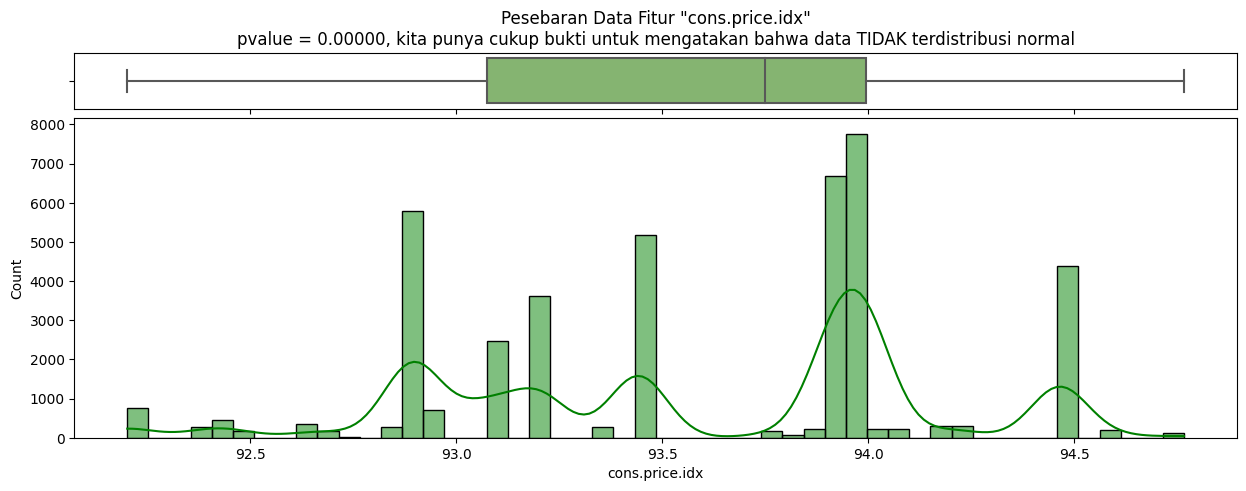

In [364]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["cons.price.idx"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "cons.price.idx"\n{distribusi}""", color = "black")
sns.boxplot(x = df["cons.price.idx"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["cons.price.idx"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

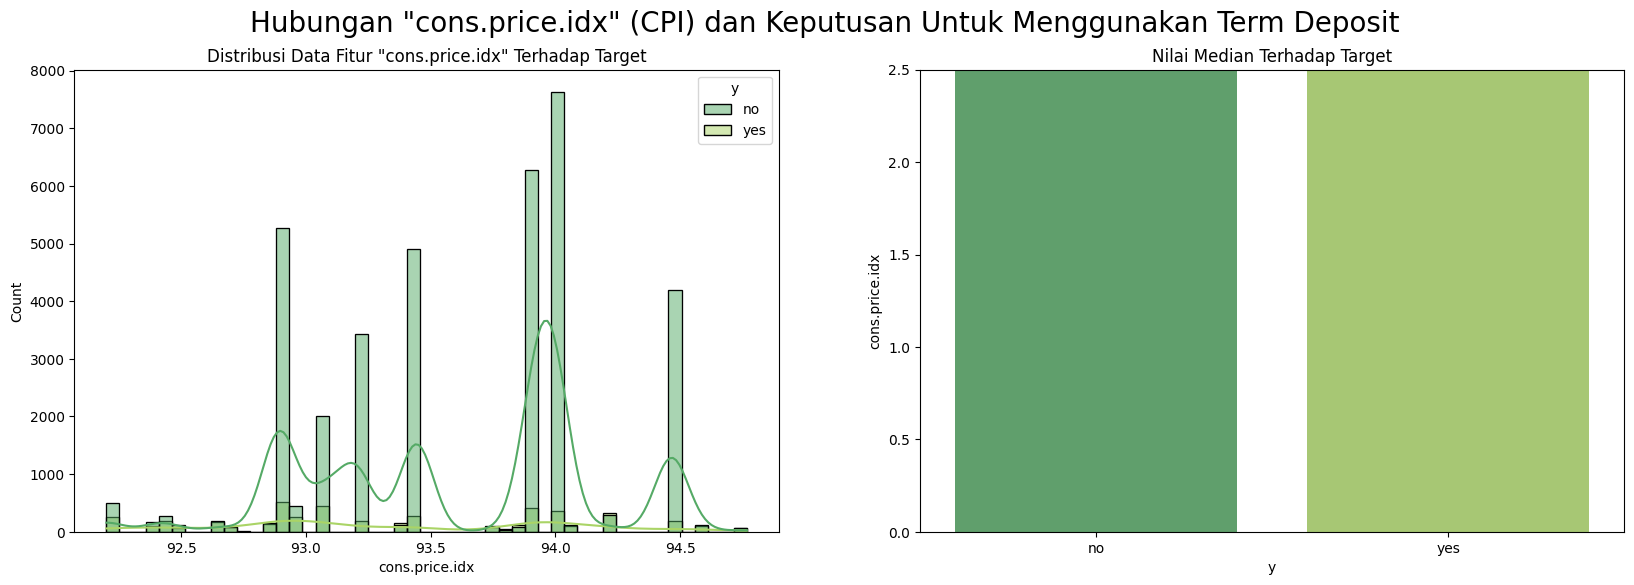

In [365]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "cons.price.idx" (CPI) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "cons.price.idx" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['cons.price.idx'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'cons.price.idx', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 2.5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indeks CPI dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `cons.price.idx` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data cons.price.idx 'Yes' == Distribusi data cons.price.idx 'No'
- Ha : Distribusi data cons.price.idx 'Yes' != Distribusi data cons.price.idx 'No'

In [366]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['cons.price.idx'],
    df[df['y'] == 'no']['cons.price.idx'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`cons.price.idx`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `cons.price.idx` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **1.4.3 Fitur `cons.conf.idx`**

<Figure size 1500x2000 with 0 Axes>

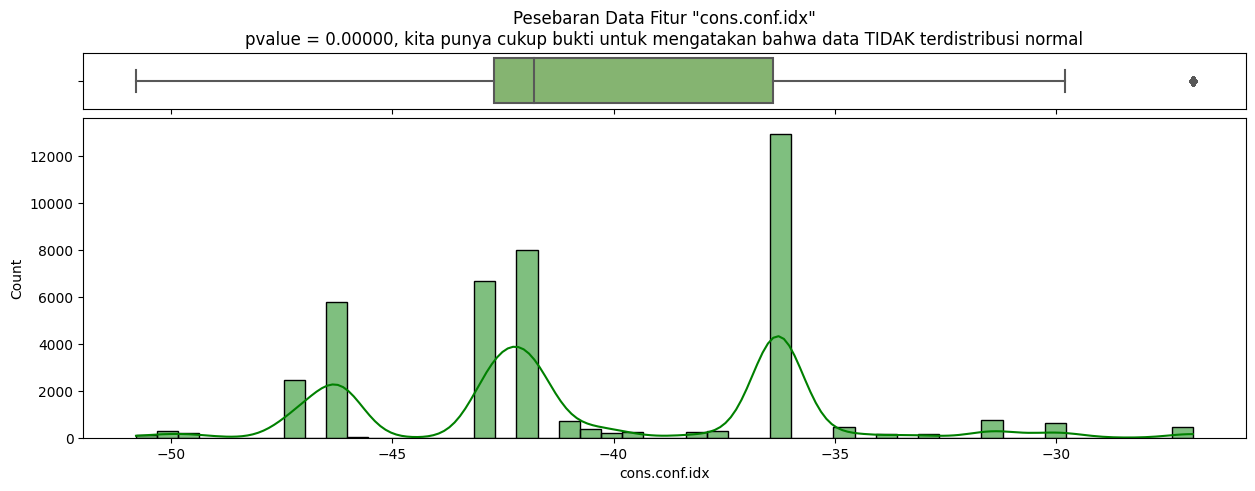

In [367]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["cons.conf.idx"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "cons.conf.idx"\n{distribusi}""", color = "black")
sns.boxplot(x = df["cons.conf.idx"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["cons.conf.idx"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

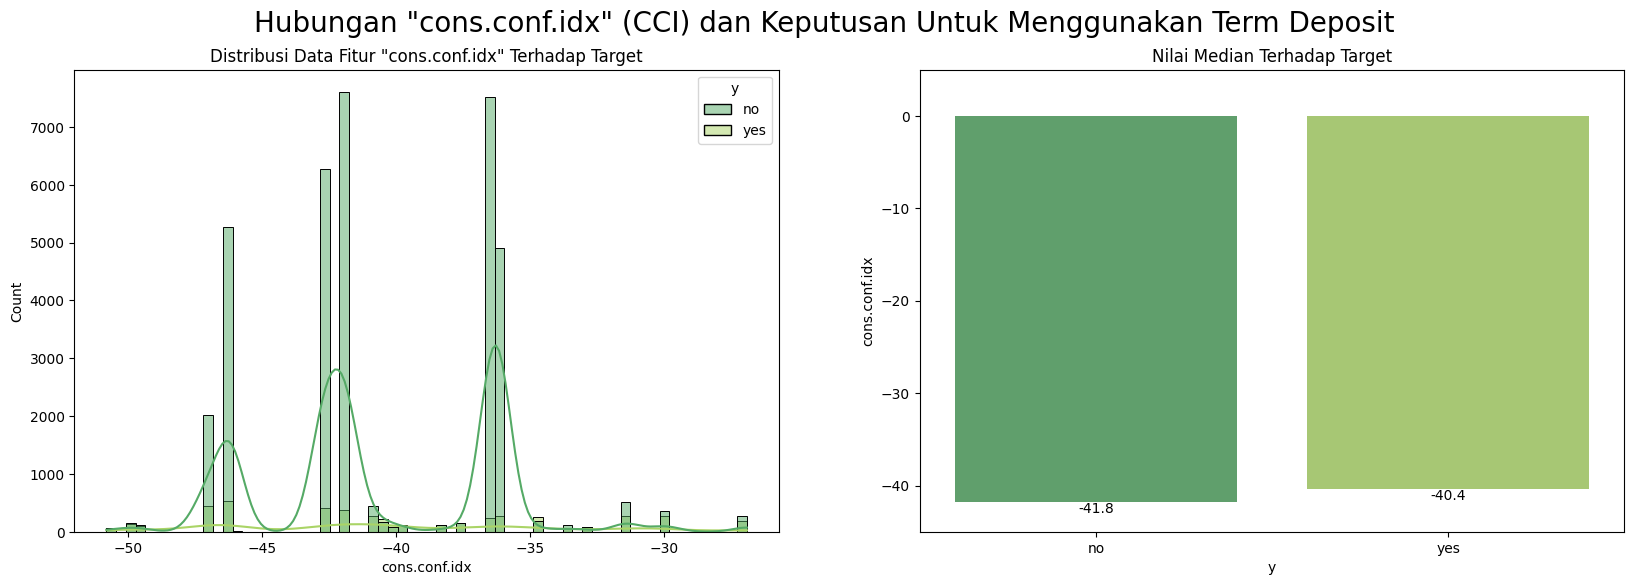

In [368]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "cons.conf.idx" (CCI) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "cons.conf.idx" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['cons.conf.idx'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'cons.conf.idx', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([-45, 5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indeks CCI dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `cons.conf.idx` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data cons.conf.idx 'Yes' == Distribusi data cons.conf.idx 'No'
- Ha : Distribusi data cons.conf.idx 'Yes' != Distribusi data cons.conf.idx 'No'

In [369]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['cons.conf.idx'],
    df[df['y'] == 'no']['cons.conf.idx'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`cons.conf.idx`" antara nasabah yang menggunakan Term Deposit dan nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `cons.conf.idx` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **1.4.4 Fitur `euribor3m`**

<Figure size 1500x2000 with 0 Axes>

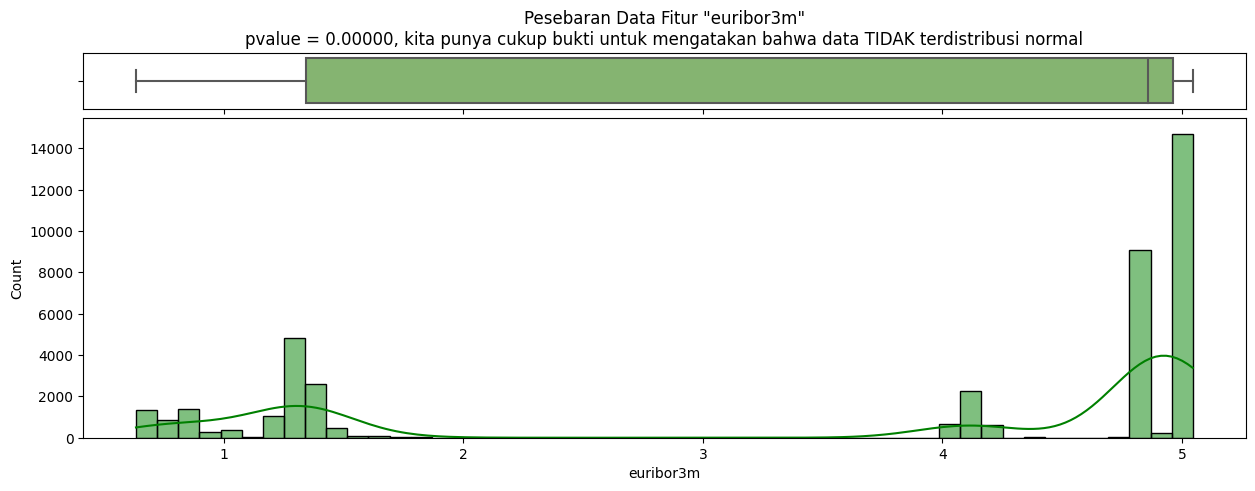

In [370]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["euribor3m"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "euribor3m"\n{distribusi}""", color = "black")
sns.boxplot(x = df["euribor3m"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["euribor3m"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

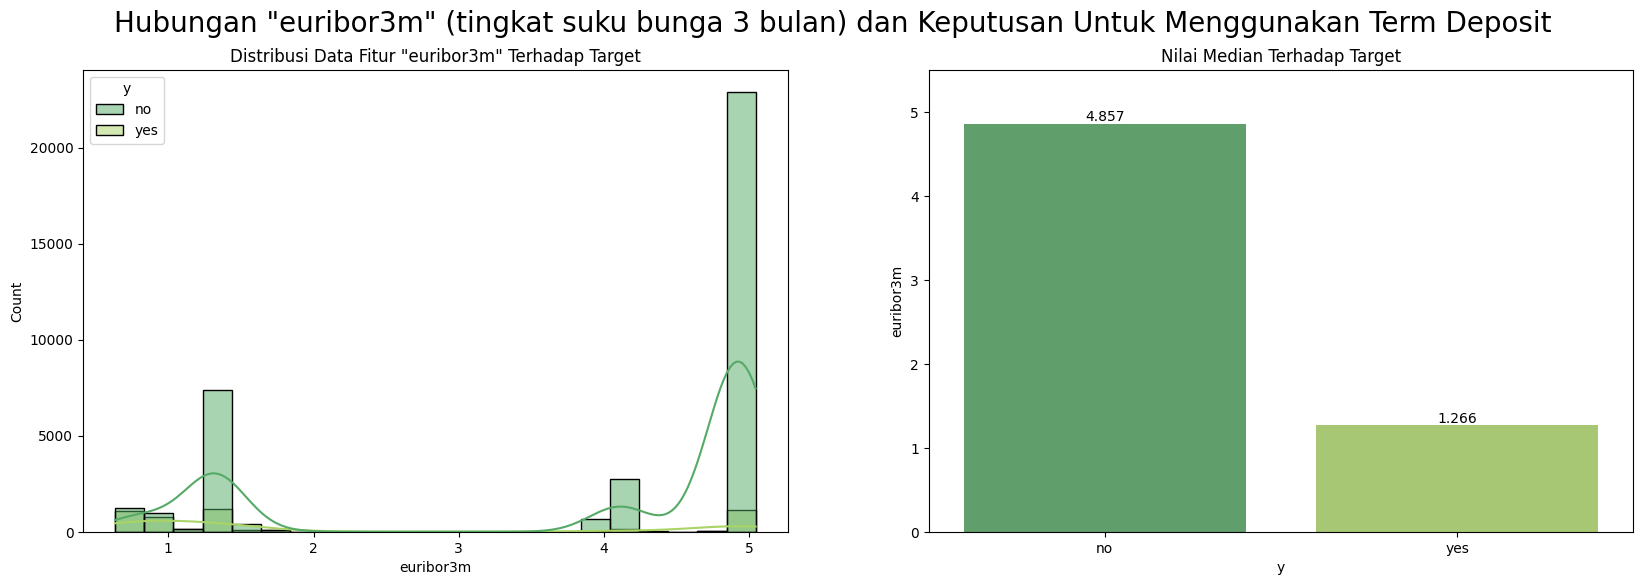

In [371]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "euribor3m" (tingkat suku bunga 3 bulan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "euribor3m" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['euribor3m'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'euribor3m', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 5.5])

plt.show()

**Insight :**

Dari grafik nilai median terhadap target diatas terlihat jelas bahwa **nasabah akan melakukan/ menggunakan produk Term Deposit ketika ...** 

#### **1.4.5 Fitur `nr.employed`**

<Figure size 1500x2000 with 0 Axes>

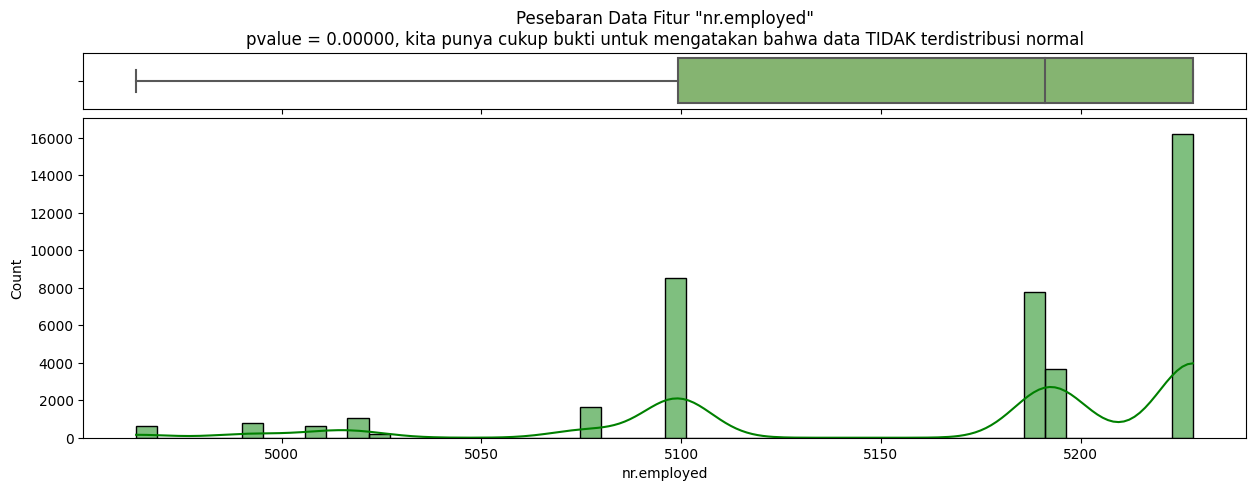

In [372]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["nr.employed"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "nr.employed"\n{distribusi}""", color = "black")
sns.boxplot(x = df["nr.employed"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["nr.employed"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

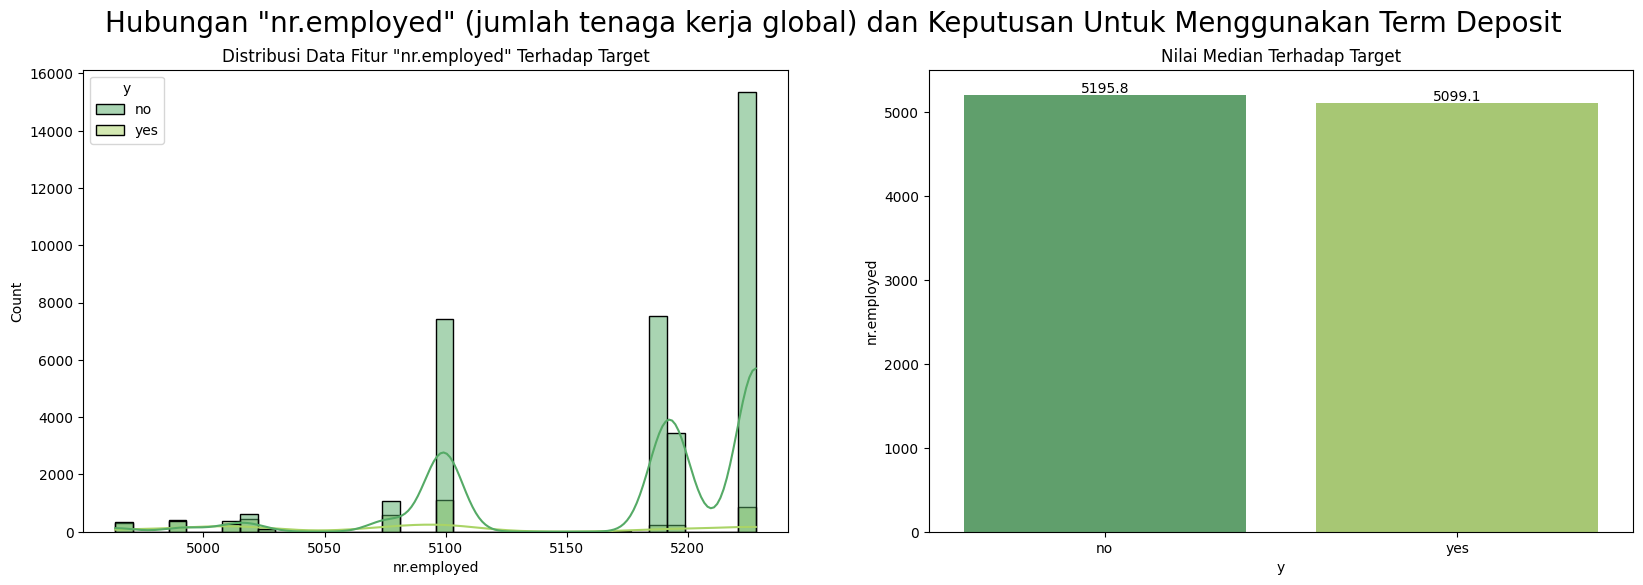

In [373]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "nr.employed" (jumlah tenaga kerja global) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "nr.employed" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['nr.employed'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'nr.employed', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 5500])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indikator jumlah tenaga kerja global dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `nr.employed` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data nr.employed 'Yes' == Distribusi data nr.employed 'No'
- Ha : Distribusi data nr.employed 'Yes' != Distribusi data nr.employed 'No'

In [374]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['nr.employed'],
    df[df['y'] == 'no']['nr.employed'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`nr.employed`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `nr.employed` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

### **1.5 Summary EDA**

Berdasarkan dari analisis yang telah kita lakukan sebelumnya, dapat memberikan beberapa kesimpulan atau ringkisan sebagai berikut:

1. Calon nasabah dengan rentang usia **30-45 tahun** merupakan target utama bank, karena usia ini dianggap cukup matang dari segi finansial.
2. Hasil analisis menunjukkan bahwa kelompok usia **56-74 tahun** dan **15-24 tahun** memiliki conversion rate tertinggi, yaitu **0.43** dan **0.24**, lebih tinggi daripada kelompok usia produktif.
3. Meskipun pekerjaan **admin** dan **blue-collar** paling banyak ditawari term deposit, pekerjaan sebagai **student (pelajar)** dan **retired (pensiunan)** memiliki conversion rate yang lebih tinggi, yaitu **0.31** dan **0.25**.
4. Meskipun nasabah dengan status pernikahan **married (sudah menikah)** paling banyak ditawari term deposit, nasabah dengan status **single (belum menikah)** memiliki conversion rate yang tinggi, yaitu **0.14**.
5. Pendidikan terakhir **university.degree (gelar universitas)** merupakan yang paling banyak ditawari term deposit dan memiliki conversion rate tinggi, yaitu **0.14**.
6. Ditemukan bahwa nasabah yang pernah mengalami **gagal bayar memiliki conversion rate 0%**, dan hanya **3 nasabah (0.0072%)** yang pernah mengalami ini.
7. Tidak terlihat perbedaan signifikan antara nasabah yang **memiliki cicilan rumah (housing loan)** dan yang tidak memiliki terkait conversion rate.
8. Pada kolom loan, meskipun nasabah **tanpa pinjaman** lebih banyak dihubungi, conversion rate-nya hampir sama dengan **nasabah yang memiliki pinjaman**.
9. Strategi bank yang lebih sering menghubungi nasabah **melalui nomor ponsel (cellular)** terbukti efektif dengan conversion rate **0.15** dibandingkan dengan nomor telepon biasa dengan conversion rate **0.05**.
10. Bulan-bulan seperti **Maret, September, Oktober, dan Desember** memiliki conversion rate tinggi meskipun jumlah kontak relatif rendah. Di sisi lain, bulan Mei memiliki jumlah kontak tinggi tetapi conversion rate rendah.
11. **Hari Kamis** adalah hari terbaik untuk kontak terakhir dengan conversion rate 0.12.
12. Durasi panggilan **lama (very long call)** memiliki conversion rate tertinggi, diikuti oleh **medium long call**, **medium short call**, dan **very short call**.
13. Sebagian besar nasabah tidak pernah dihubungi sebelumnya (kategori **999**).
14. Nilai median dari lamanya kontak terakhir tidak menunjukkan perbedaan yang signifikan antara nasabah yang menggunakan term deposit dan yang tidak.
15. Sebagian besar nasabah tidak dihubungi pada campaign sebelumnya (kategori **0**).

Kesimpulan ini dapat membantu meningkatkan conversion rate dan keuntungan bank, diharapkan juga dapat meningkatkan keuntungan dari bank tersebut

### **1.6 Rekomendasi EDA**

Berdasarkan analisis yang telah dilakukan, berikut adalah beberapa rekomendasi untuk meningkatkan conversion rate dan, dengan demikian, meningkatkan keuntungan perusahaan:

1. **Segmentasi Demografis yang Lebih Tepat**: Lakukan penargetan lebih kuat kepada dua segmen usia, yaitu kepada nasabah yang berusia antara 17 hingga 25 tahun dan nasabah yang berusia di atas 65 tahun. Demikian juga, fokus pada nasabah yang berprofesi sebagai mahasiswa atau pensiunan.

2. **Penargetan Pernikahan 'Single'**: Tingkatkan upaya pemasaran kepada nasabah yang memiliki status pernikahan "Single."

3. **Edukasi Keuangan**: Sediakan lebih banyak informasi dan pendidikan keuangan kepada nasabah dengan tingkat pendidikan rendah, seperti "Illiterate" atau pendidikan dasar, dengan harapan bahwa ini akan meningkatkan conversion rate.

4. **Hindari Nasabah dengan Riwayat "Default"**: Hindari menghubungi nasabah yang memiliki riwayat gagal bayar ("Default"), karena kemungkinan besar mereka tidak akan tertarik untuk berlangganan term deposit.

5. **Prioritaskan Komunikasi Melalui Ponsel**: Lebih banyak melakukan komunikasi melalui nomor telepon genggam (cellular) daripada menggunakan telepon rumah.

6. **Pantau Suku Bunga Euribor**: Lebih intensif menghubungi nasabah pada bulan-bulan di mana suku bunga Euribor sedang turun, guna mengevaluasi konsistensi conversion rate.

7. **Kontak di Hari Kamis**: Prioritaskan hari Kamis untuk menghubungi nasabah, mungkin karena ada kemungkinan tinggi untuk mendapatkan respons yang baik.

8. **Pendekatan Kreatif dan Interaktif**: Cobalah untuk menghadirkan percakapan yang lebih menarik dan berinteraksi dengan nasabah, bahkan jika ini memakan waktu lebih lama.

9. **Batas Panggilan Harian**: Batasi jumlah panggilan ke satu nasabah agar tidak melebihi 20 kali, karena panggilan berulang yang berlebihan bisa menjadi tidak efektif.

10. **Prioritaskan Nasabah yang Telah Berpartisipasi**: Lebih intensif menghubungi nasabah yang telah berhasil mengikuti kampanye sebelumnya, karena mereka lebih mungkin untuk berlangganan kembali.

11. **Perhatikan Indikator Ekonomi**: Hubungi nasabah ketika indikator "Employment Variation Rate" menunjukkan tren negatif (banyak pemutusan hubungan kerja) dan ketika "CPI" (tingkat inflasi) rendah, serta "CCI" (Indeks Keyakinan Konsumen) tinggi.

12. **Reaksi terhadap Suku Bunga Euribor**: Prioritaskan komunikasi saat suku bunga Euribor 3 bulan sedang rendah, karena ini mungkin lebih mempengaruhi keputusan nasabah.

13. **Perhatikan Jumlah Karyawan**: Hubungi nasabah ketika indikator "Number of Employee" menunjukkan jumlah karyawan sedang rendah, karena situasi ini mungkin mempengaruhi keputusan nasabah terkait term deposit.

Dengan mengikuti rekomendasi ini dan menyesuaikannya dengan strategi pemasaran yang lebih spesifik, diharapkan akan meningkatkan conversion rate dan hasilnya akan mendukung pertumbuhan bisnis perusahaan.

## **`2. Data Preprocessing`**

Pada bagian `Data Preprocessing` ini, kita akan melakukan beberapa treatment pada dataset yang kita miliki agar sesuai dengan kebutuhan model machine learning yang akan digunakan. Tahap ini sangat penting dalam membangun model machine learning karena dapat mempengaruhi kinerja dan kualitas model yang akan dihasilkan. Treatment yang akan dilakukan pada dataset ini adalah sebagai berikut:

### **2.1 Handling Missing Value**

<Axes: >

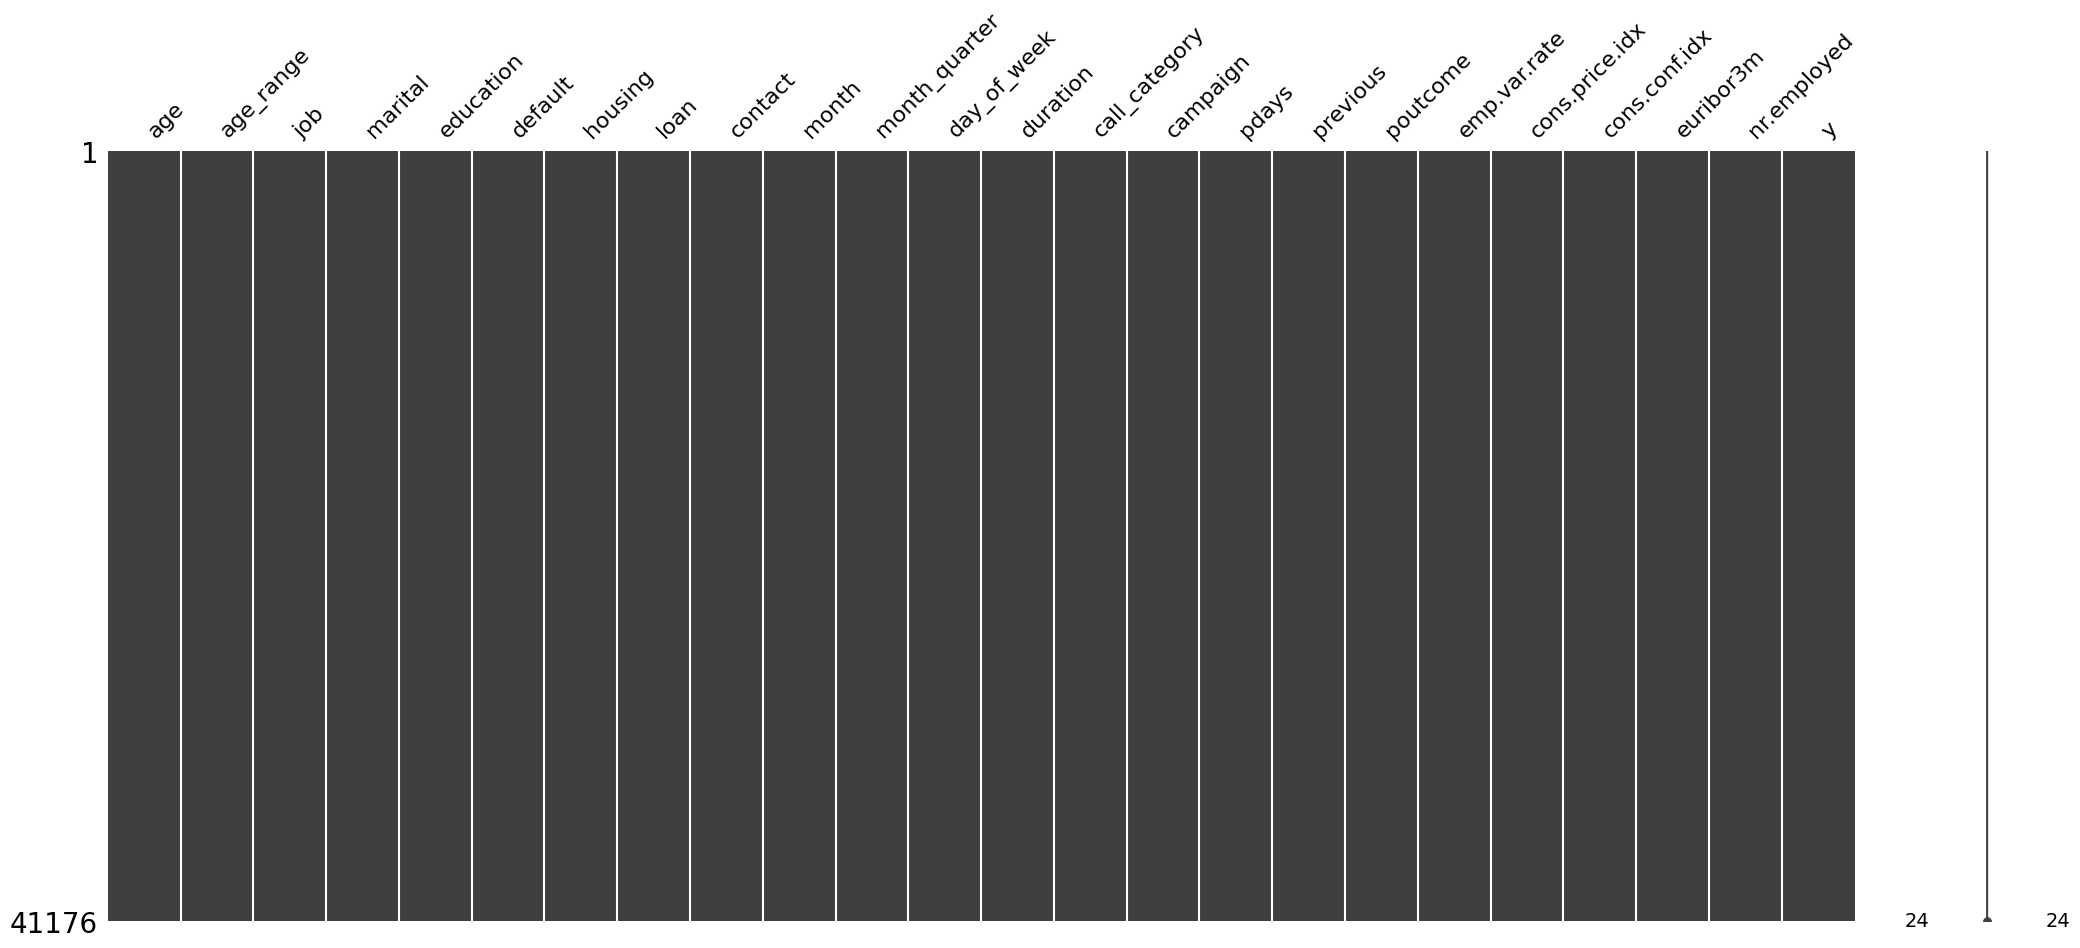

In [375]:
msno.matrix(df)

In [376]:
# Cek Missing Value
df.isna().sum()

age               0
age_range         0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
month_quarter     0
day_of_week       0
duration          0
call_category     0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

__Insight:__

Berdasarkan informasi yang didapatkan pada dataset, didapatkan bahwa semua missing value pada dataset diganti dengan suatu data dengan nilai 'unknown'. Untuk, dapat melihat distribusi pada nilai 'unknown' maka semua data unknown akan diubah menajadi np.nan kemudian dilihat distribusi datanya.

In [377]:
# Mengubah semua nilai 'unknown' menjadi np.nan
for i in df.columns :
    df[i] = np.where(df[i]=='unknown', np.nan, df[i])

<Axes: >

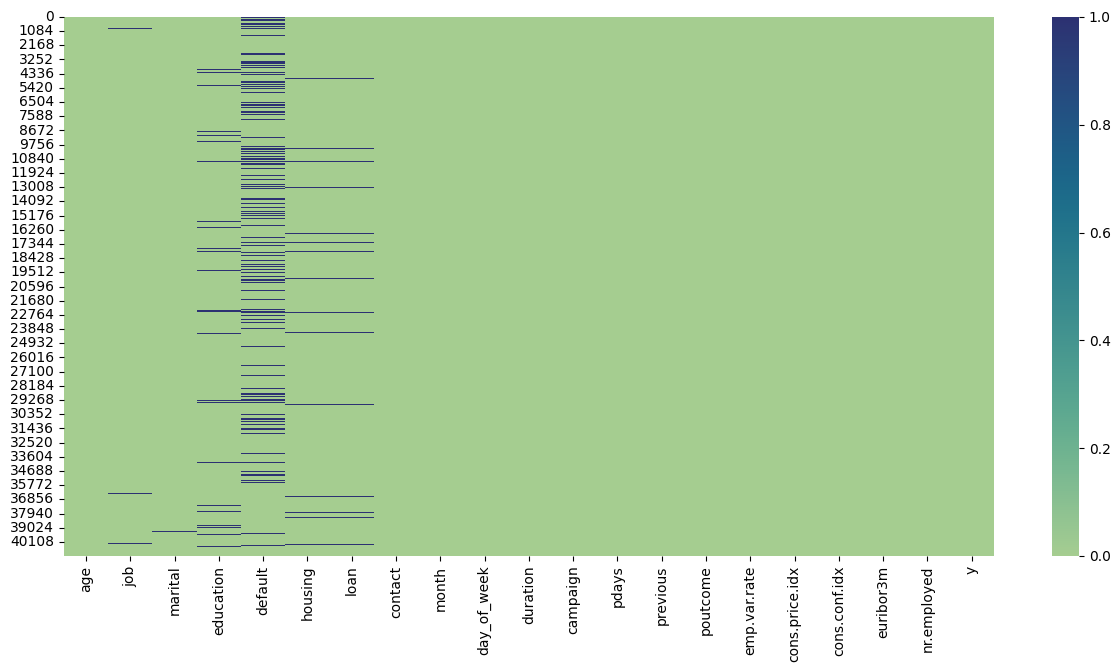

In [378]:
# Sebaran missing value di dalam data
plt.figure(figsize=(15,7))
sns.heatmap(df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].isna(), cmap="crest")

In [379]:
# Cek Missing Value
df.isna().sum()

age                  0
age_range            0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
month_quarter        0
day_of_week          0
duration             0
call_category        0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Pada proses selanjutnya kita akan handing missing value yang bernilai `unknown`

In [380]:
# Mengisi missing Value dengan data 'unknown'
df=df.fillna('unknown')

#### **2.1.1 Handling `unknown` in `job`**

In [381]:
# Grouping kategori kolom job
def grouping(x):
    if x == 'admin.':
        return 'Employee'
    elif x == 'blue-collar':
        return 'Employee'
    elif x == 'entrepreneur':
        return 'Entrepreneur'
    elif x == 'housemaid':
        return 'Employee'
    elif x == 'management':
        return 'Employee'
    elif x == 'retired':
        return 'Other'
    elif x == 'self-employed':
        return 'Entrepreneur'
    elif x == 'services':
        return 'Employee'
    elif x == 'student':
        return 'Other'
    elif x == 'technician':
        return 'Employee'
    elif x == 'unemployed':
        return 'Unemployed'
    else:
        return 'Other'

df['job'] = df['job'].apply(lambda x: grouping(x))

In [382]:
# Menghitung kategori di setiap kolom job
df.job.value_counts()

Employee        34362
Other            2923
Entrepreneur     2877
Unemployed       1014
Name: job, dtype: int64

__Insight:__

Pada kolom `job` kita kelompokkan menjadi 4 kategori pekerjaan. Yaitu `admin`, `blue-collar`, `housemaid`, `management`, `services`, `technician` dikelompokkan menjadi kategori `Employee`. Selanjutnya `entrepreneur`, `self-employed` dikelompokkan menjadi kategori `Entrepreneur`. Selanjutnya `retired`, `unknown` dikelompokkan menjadi kategori `Other`, dan `unemployed` tetap menjadi kategori `Unemployed`. Pengelompokan ini berdasarkan domain knowledge, dan informasi yang kita dapat dari [website](https://simpedak.blitarkota.go.id/buku_data/jenis_pekerjaan) berikut.

#### **2.1.2 Handling `unknown` in `marital`**

In [383]:
# Menghitung kategori di setiap kolom marital
df.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [384]:
# Menghapus nilai unknown pada kolom marital
df = df[df['marital'] != 'unknown']

In [385]:
# Menghitung kategori di setiap kolom marital
df.marital.value_counts()

married     24921
single      11564
divorced     4611
Name: marital, dtype: int64

__Insight:__

Nilai `unknown` pada kolom `marital` di hapus karena presentasenya yang sedikit.

#### **2.1.3 Handling `unknown` in `education`**

In [386]:
# Menghitung kategori di setiap kolom education
df.education.value_counts()

university.degree      12133
high.school             9498
basic.9y                6037
professional.course     5234
basic.4y                4170
basic.6y                2285
unknown                 1721
illiterate                18
Name: education, dtype: int64

In [387]:
# Grouping kategori kolom education
def grouping(x):
    if x == 'basic.4y':
        return 'Primary Education'
    elif x == 'basic.6y':
        return 'Primary Education'
    elif x == 'basic.9y':
        return 'Primary Education'
    elif x == 'high.school':
        return 'Secondary Education'
    elif x == 'illiterate':
        return 'Other'
    elif x == 'professional.course':
        return 'Secondary Education'
    elif x == 'university.degree':
        return 'Higher Education'
    else:
        return 'Other'

df['education'] = df['education'].apply(lambda x: grouping(x))

In [388]:
# Menghitung kategori di setiap kolom education
df.education.value_counts()

Secondary Education    14732
Primary Education      12492
Higher Education       12133
Other                   1739
Name: education, dtype: int64

__Insight:__

Pada kolom `education` kita kelompokkan menjadi 4 kategori. Yaitu `basic.4y`, `basic.6y`, `basic.9y` dikelompokkan menjadi kategori `Primary Education`. Selanjutnya `high.school`, `professional.course` dikelompokkan menjadi kategori `Secondary Education`. Selanjutnya `illiterate`, `unknown` dikelompokkan menjadi kategori `Other`, dan `university.degree` menjadi kategori `Higher Education`. Pengelompokan ini mengacu pada informasi [expatica.com](https://www.expatica.com/pt/education/children-education/the-education-system-in-portugal-105195/).

#### **2.1.4 Handling `unknown` in `default`**

In [389]:
# Menghitung kategori di setiap kolom default
df.default.value_counts()

no         32508
unknown     8585
yes            3
Name: default, dtype: int64

In [390]:
# Menghapus nilai yes pada kolom default
df = df[df['default'] != 'yes']

In [391]:
# Merubah nilai unknown menjadi kategori no
def grouping(x):
    if x == 'no':
        return 'no'
    else:
        return 'no'

df['default'] = df['default'].apply(lambda x: grouping(x))

In [392]:
# Menghitung kategori di setiap kolom default
df.default.value_counts()

no    41093
Name: default, dtype: int64

__Insight:__

Pada kolom `default` kita menghapus nilai `yes` karena jumalah datanya hanya 3 dan dari ketiganya tidak ada yang berlangganan deposito. Selanjutnya kita mengelompokkan nilai `unknown` menjadi nilai `no`, dengan asumsi semua calon nasabah tidak ada yang gagal bayar kredit, hal ini tentu akan menjadi `limitasi untuk model` yang nantinya dibangun. Dengan semua nilainya menjadi `no` maka selanjutnya kolom `default` tidak digunakan sebagai fitur pada pemodelan machine learning. Selanjutnya bila di kemudian hari terdapat pelanggan yang mengalami kredit macet akan diprioritaskan untuk menulasi terlebih dahulu, dan tidak diprioritaskan untuk calon nasabah program term deposit. Hal ini akan di jelaskan lebih lanjut di `limitasi model`.

#### **2.1.5 Handling `unknown` in `housing`**

In [393]:
# Menghitung kategori di setiap kolom housing
df.housing.value_counts()

yes        21535
no         18569
unknown      989
Name: housing, dtype: int64

In [394]:
# Menghapus nilai unknown pada kolom housing
df = df[df['housing'] != 'unknown']

In [395]:
# Menghitung kategori di setiap kolom housing
df.housing.value_counts()

yes    21535
no     18569
Name: housing, dtype: int64

__Insight:__

Nilai `unknown` pada kolom `housing` di hapus karena jumlahnya yang sedikit.

#### **2.1.6 Handling `unknown` in `loan`**

In [396]:
# Menghitung kategori di setiap kolom loan
df.loan.value_counts()

no     33868
yes     6236
Name: loan, dtype: int64

__Insight:__

Nilai `unknown` pada kolom `loan` sudah ikut terhapus karena nilai `unknown` pada kolom `loan` berkaitan atau memiliki pola yang sama dengan nilai `unknown` pada kolom `housing`. 

### **2.2 Handling Data Duplicated**

In [397]:
# Cek Data Duplikat

nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')

Jumlah Data Duplikat: 10
Persentase Data Duplikat: 0.02%


__Insight:__
* Terdapat 10 data duplikat dari 41,188 41176 baris data dengan persentase sebesar 0.02%
* Dari dataset yang disajikan tidak memiliki variabel tipe "**ID Data**", sehingga data duplikat dapat dianggap benar-benar duplikat
* Solution : Drop data duplikat tersebut

In [398]:
# Handling data duplicate

df.drop_duplicates(inplace=True)
nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)

print(f"*** Handling data duplikat sudah dilakukan ***\n\nJumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%")

*** Handling data duplikat sudah dilakukan ***

Jumlah Data Duplikat: 0
Persentase Data Duplikat: 0.0%


### **2.3 Change Target Column Name and Value**

In [399]:
df = df.rename(columns={'y' : 'Deposit'})

In [400]:
df['Deposit'] = np.where(df['Deposit'] == 'yes',1,0)

In [401]:
df.head()

,age,age_range,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56.0,40-64,Employee,married,Primary Education,no,no,no,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,40-64,Employee,married,Secondary Education,no,no,no,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,25-39,Employee,married,Secondary Education,no,yes,no,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,>75,Employee,married,Primary Education,no,no,no,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,40-64,Employee,married,Secondary Education,no,no,yes,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


__Insight:__

Pada proses ini, kolom target yang sebelumnya `y` dirubah menjadi `Deposit` agar lebih mudah dipahami. Untuk nilainya dirubah yang sebelumnya bernilai `yes` dirubah menjadi 1, dan nilai `no` dirubah menjadi 0, hal tersebut dilakukan untuk mempermudah saat proses machine learning.

### **2.4 Handling Outlier**

In [402]:
numerical_features_model = df.describe().columns

In [403]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features_model: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features_model,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,age,9.5000,69.5000,0,39635,459,1.14
1,duration,-225.0000,647.0000,0,37228,2866,7.15
2,campaign,-2.0000,6.0000,0,37759,2335,5.82
3,pdays,999.0000,999.0000,1476,38618,0,3.68
4,previous,0.0000,0.0000,0,34628,5466,13.63
5,emp.var.rate,-6.6000,6.2000,0,40094,0,0.00
6,cons.price.idx,91.6965,95.3725,0,40094,0,0.00
7,cons.conf.idx,-52.1500,-26.9500,0,39662,432,1.08
8,euribor3m,-4.0815,10.3865,0,40094,0,0.00
9,nr.employed,4905.6000,5421.6000,0,40094,0,0.00


__Insight:__

Dari tabel diatas dapat dilihat terdapat 5 kolom numerikal pada fitur yang memiliki outlier, yaitu kolom `age` sebanyak `1.12%` outlier, kolom `campaign` sebanyak `5.84%` outlier, kolom `pdays` sebanyak `3.68%` outlier, kolom `previous` sebanyak `13.66%` outlier, dan kolom `cons.conf.idx` sebanyak `1.08%` outlier.

##### **2.4.1 Proporsi Pada Dataset**

In [404]:
df['Deposit'].value_counts()/len(df)

0    0.887265
1    0.112735
Name: Deposit, dtype: float64

Data ini termasuk pada kategori moderate imbalance (minority class between 1% - 20%). Sekarang, mari kita lihat proporsi kelas pada setiap data outlier :

##### **2.4.2 Proporsi data pada kolom age**

<Axes: xlabel='age'>

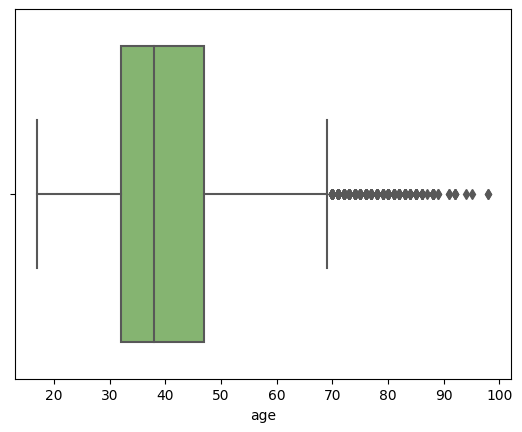

In [405]:
sns.boxplot(x=df["age"], palette="summer")

<Axes: xlabel='Deposit', ylabel='age'>

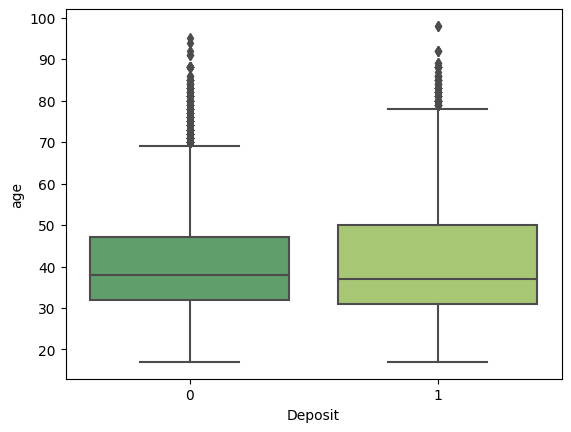

In [406]:
sns.boxplot(data=df, y="age", x="Deposit", palette="summer")

In [407]:
# proporsi target untuk data outlier pada kolom age
df[df['age']>69.5]['Deposit'].value_counts()/len(df[df['age']>69.5]) * 100

0    52.723312
1    47.276688
Name: Deposit, dtype: float64

__Insight:__

Dari informasi diatas terlihat perbandingan nasabah yang berlangganan deposito dan tidak deposito pada outlier kolom `age`. Di putuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini diperkuat dengan tidak ada batasan usia ketika orang akan berlangganan deposito. Karena deposito di hari tua juga sangat mungkin dan deposito tersebut dapat di wariskan nantinya. Untuk mendukung argumen tersebut dapat merujuk pada kedua link berikut [Link1: CNBC Indonesia](https://www.cnbcindonesia.com/mymoney/20230820192755-72-464463/udah-tahu-belum-6-aset-ini-bisa-diwariskan-secara-gratis#:~:text=Tabungan%20dan%20Deposito,berbeda%2Dbeda%20untuk%20setiap%20bank), [Link2: Investasi Online](https://investasi.online/cara-mengurus-pencairan-deposito-bagi-ahli-waris/)

##### **2.4.3 Proporsi data pada kolom campaign**

<Axes: xlabel='campaign'>

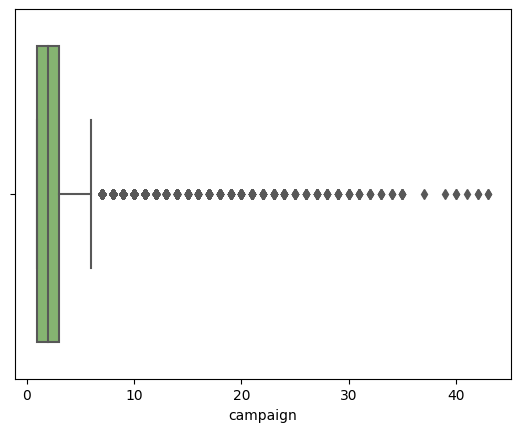

In [408]:
sns.boxplot(x=df["campaign"], palette="summer")

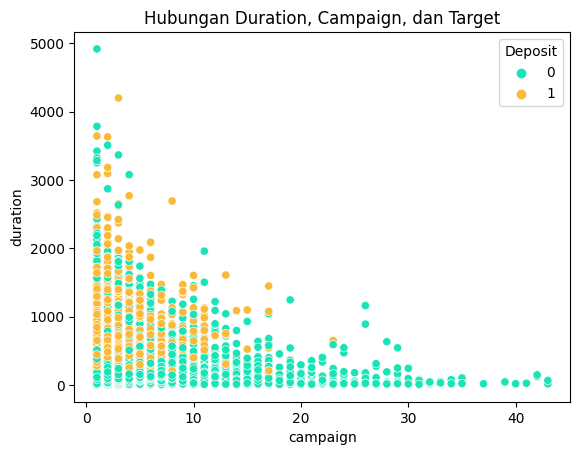

In [409]:
plt.title('Hubungan Duration, Campaign, dan Target')
sns.scatterplot(data=df, x = 'campaign', y = 'duration', hue='Deposit', palette="turbo")
plt.show()

In [410]:
# proporsi target untuk data outlier pada kolom campaign
df[df['campaign']>6]['Deposit'].value_counts()/len(df[df['campaign']>6]) * 100

0    95.331906
1     4.668094
Name: Deposit, dtype: float64

In [411]:
# Cek campaign > 20
df[df['campaign'] > 20].count()['campaign']

154

In [412]:
# Melakukan filtering pada data
df = df[(df['campaign'] < 20)]

__Insight:__

Dari informasi diatas dapat dilihat bahwa setelah 20 kali melakukan kontak, hanya 1 nasabah yang akhirnya melakukan deposit. Dari sini nilai outlier pada kolom `campaign` yang nilainya lebih besar dari 20 akan dihapuskan.

##### **2.4.4 Proporsi data pada kolom pdays**

<Axes: xlabel='pdays'>

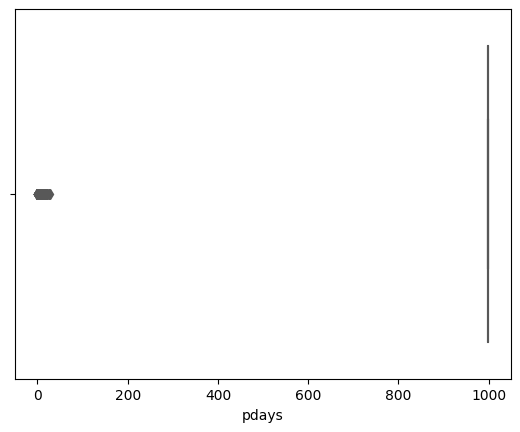

In [413]:
sns.boxplot(x=df["pdays"], palette="summer")

In [414]:
# proporsi target untuk data outlier pada kolom pdays
df[df['pdays']<999]['Deposit'].value_counts()/len(df[df['pdays']<999]) * 100

1    63.617886
0    36.382114
Name: Deposit, dtype: float64

__Insight:__

Pada kolom `pdays` diputuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini terjadi karena pada boxplot, lower dan upper berada di angka 999, dimana nilai 999 adalah nasabah yang tidak pernah dihubungi sebelumnya, yang artinya 90% customer pada dataset tidak mengikuti promo sebelumnya, sehingga tentu saja customer yang merupakan outlier merupakan customer yang mengikuti promo sebelumnya yang dimana informasi itu sangat penting       

##### **2.4.5 Proporsi data pada kolom previous**

<Axes: xlabel='previous'>

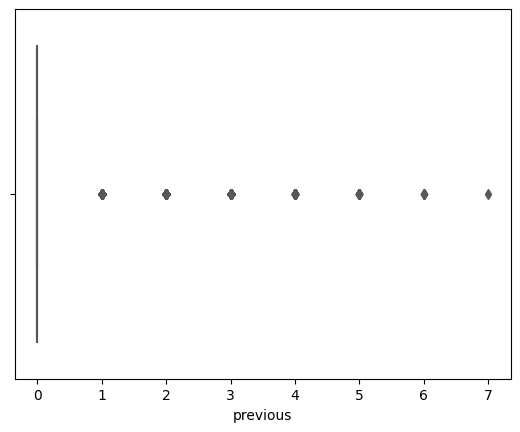

In [415]:
sns.boxplot(x=df["previous"], palette="summer")

In [416]:
# proporsi target untuk data outlier pada kolom previous
df[df['previous']>0]['Deposit'].value_counts()/len(df[df['previous']>0]) * 100

0    73.45408
1    26.54592
Name: Deposit, dtype: float64

__Insight:__

Dari informasi diatas diputuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini juga terjadi karena pada boxplot, lower dan upper berada di angka 0 yang artinya 85% customer pada dataset tidak mengikuti promo sebelumnya, sehingga tentu saja customer yang merupakan outlier merupakan customer yang mengikuti promo sebelumnya yang dimana informasi itu sangat penting

##### **2.4.6 Proporsi data pada kolom cons.conf.idx**

<Axes: xlabel='cons.conf.idx'>

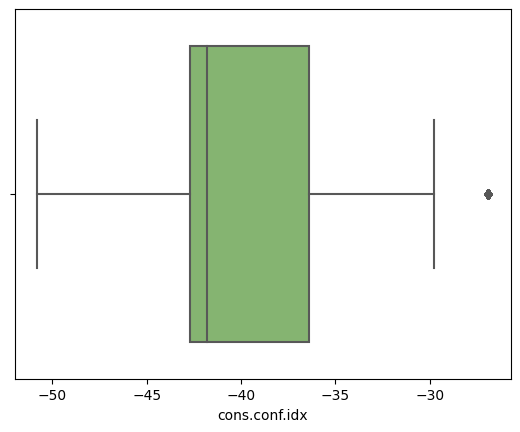

In [417]:
sns.boxplot(x=df["cons.conf.idx"], palette="summer")

<Axes: xlabel='Deposit', ylabel='cons.conf.idx'>

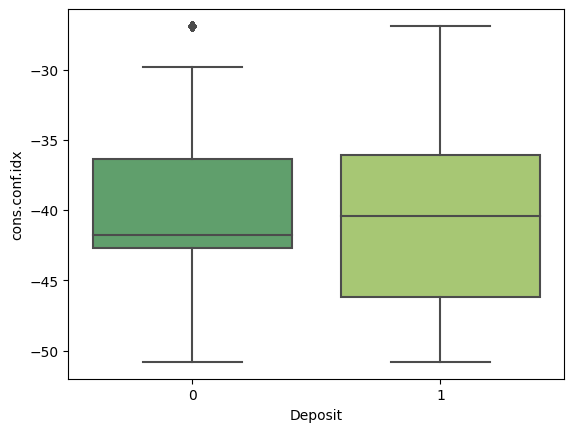

In [418]:
sns.boxplot(data=df, y="cons.conf.idx", x="Deposit", palette="summer")

In [419]:
# proporsi target untuk data outlier pada kolom cons.conf.idx
df[df['cons.conf.idx']>-26.95]['Deposit'].value_counts()/len(df[df['cons.conf.idx']>-26.95]) * 100

0    59.722222
1    40.277778
Name: Deposit, dtype: float64

__Insight:__

Dari informasi diatas terlihat perbandingan nasabah yang berlangganan deposito dan tidak deposito pada outlier kolom `cons.conf.idx`. Karena proporsi pada outlier tidak jauh berbeda dibandingkan dengan proporsi dataset awal, hal ini berarti outlier tersebut memiliki informasi penting sehingga diputuskan untuk `tidak menghapus outlier` manapun dengan harapan memiliki performa model yang baik.

### **2.5 Drop Column**

In [420]:
df.columns

Index(['age', 'age_range', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'month_quarter', 'day_of_week', 'duration',
       'call_category', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'Deposit'],
      dtype='object')

In [421]:
df_ML = df.drop(columns=['age_range', 'default', 'duration', 'call_category', 'month_quarter'])

In [422]:
df_ML.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'Deposit'],
      dtype='object')

Pada proses ini kolom `age_Range`, `duration`, dan `default` akan dihapus. Kolom `age_Range` dihapus karena kolom tersebut dibuat hanya untuk keperluan proses analisis data saja. Kolom `duration` dihapus karena kolom tersebut tidak relevan untuk proses `pemodelan machine learning`, dikarenakan kita hanya bisa mendapatkan `nilai durasi` telepon setelah nasabah memutuskan untuk melakukan `deposit atau tidak`. Kemudian kolom `default` dihapus karena dengan semua nilainya menjadi `no` maka selanjutnya kolom `default` tidak digunakan sebagai fitur pada pemodelan machine learning. Kolom lainnya akan digukan sebagai fitur karena dianggap relevan terhadap target ditinjau dari domain knoledge dan analisis yang telah dilakukan.

In [423]:
# Export data ke csv untuk modeling machine learning

df_ML.to_csv("bank_additional_data_for_ml.csv", index=False)